# MEAMs data visualization

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown

In [2]:
# song list dict
song_names = {
    'viva': 'Viva la vida',
    'o_viva': 'Viva la vida (O)',
    'c_viva': 'Viva la vida (C)',
    '4m': '4 minutes',
    'o_4m': '4 minutes (O)',
    'c_4m': '4 minutes (C)',
    'colgando': 'Colgando en tus manos',
    'o_colgando': 'Colgando en tus manos (O)',
    'c_colgando': 'Colgando en tus manos (C)',
    'yours': "I'm yours",
    'o_yours': "I'm yours (O)",
    'c_yours': "I'm yours (C)",
    'inmortal': 'Inmortal',
    'o_inmortal': 'Inmortal (O)',
    'c_inmortal': 'Inmortal (C)',
    'corazon': 'Donde estan corazon',
    'o_corazon': 'Donde estan corazon (O)',
    'c_corazon': 'Donde estan corazon (C)',
    'mercy': 'Mercy',
    'o_mercy': 'Mercy (O)',
    'c_mercy': 'Mercy (C)',
    'rehab': 'Rehab',
    'o_rehab': 'Rehab (O)',
    'c_rehab': 'Rehab (C)',
    'dstop': "Don't stop",
    'o_dstop': "Don't stop (O)",
    'c_dstop': "Don't stop (C)",
    'single': 'Single ladies',
    'o_single': 'Single ladies (O)',
    'c_single': 'Single ladies (C)'
}

# descriptors list
discovery_descriptors = {
    'knowledge_first-time-heard': 'First time heard',
    'knowledge_knows-and-dislike': 'Knows & dislikes',
    'knowledge_knows-and-ocassionally-listens': 'Knows & occasionally listens',
    'knowledge_knows-and-listens': 'Knows & listens',
    'source_own-music-search': 'Own music search',
    'source_friend': "Because of friend's taste",
    'source_family': "Because of relative's taste",
    'source_ad': 'Becaude of ad (ratio, tv, internet)'
}

# other parameters
color_map = 'OrRd'

## Data files

In [3]:
df_raw_data = pd.read_csv('raw_data.csv')
df_memory_similarity_data = pd.read_csv('memory_similarity_data.csv')

## MEAMs evocation map

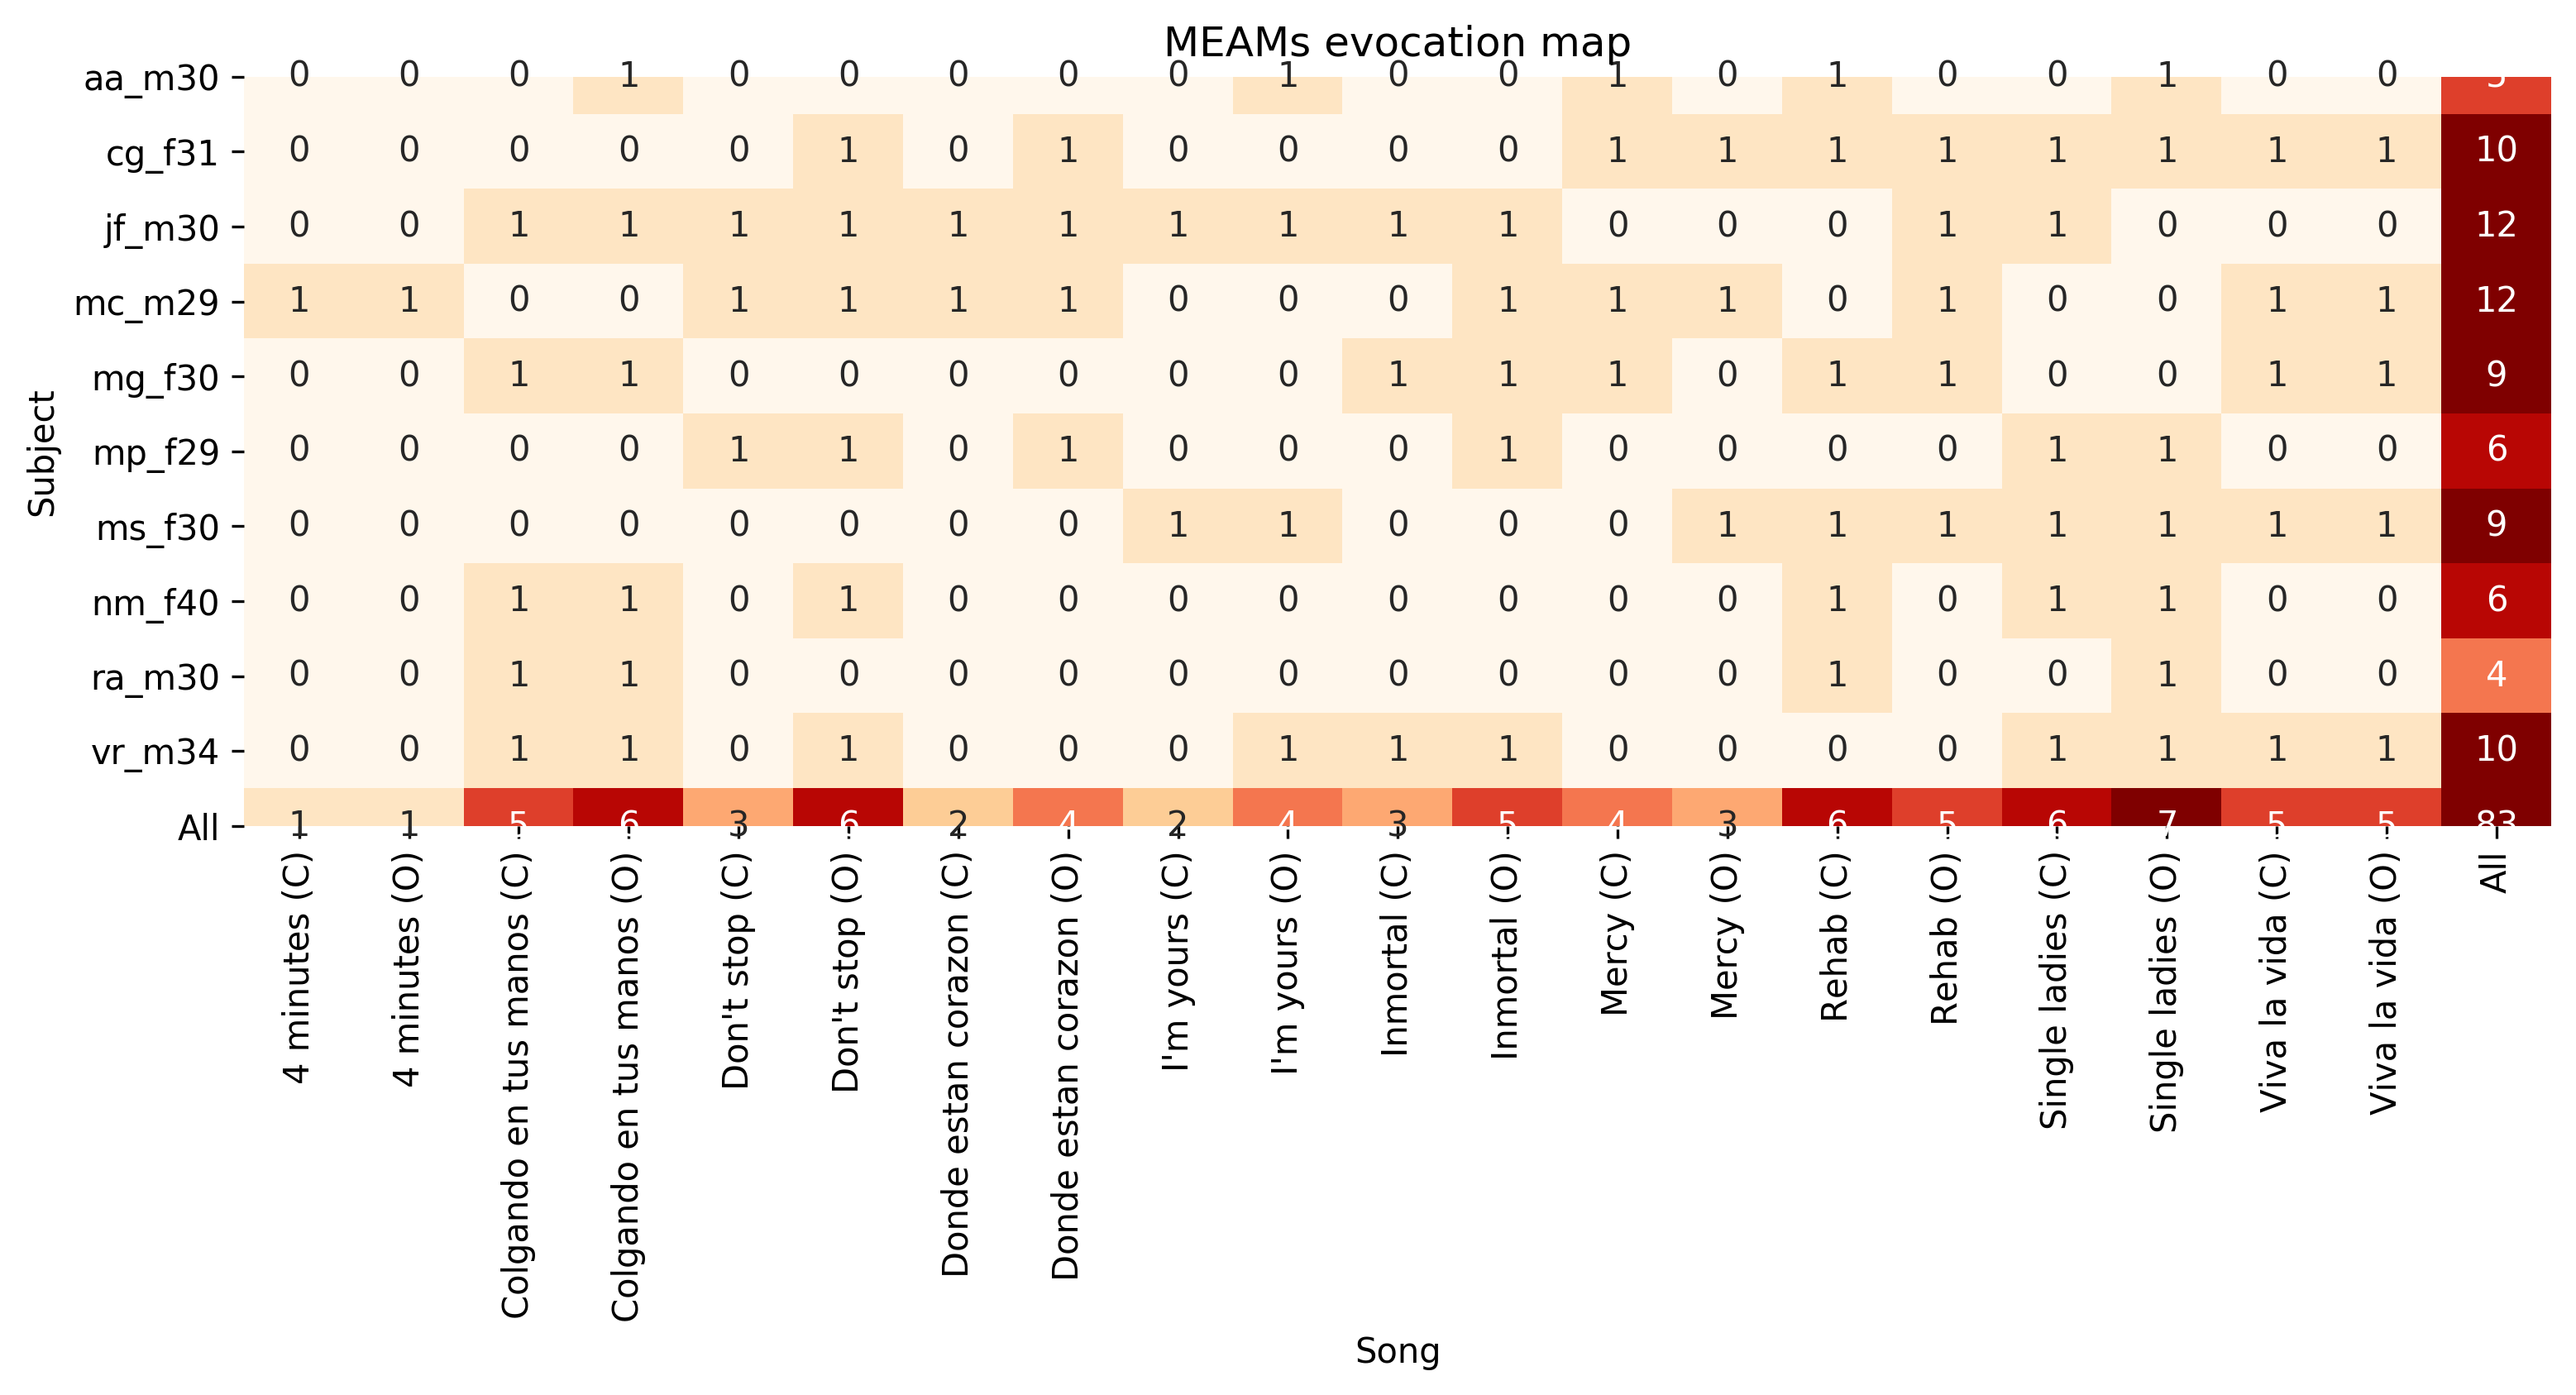

In [4]:
# copy raw data containing only rows where a memory was evoked
df_meams = df_raw_data.loc[df_raw_data['evoked_memory'] == 1].copy()

# add some extra columns to facilitate further processing
df_meams['sex'] = df_meams.apply(lambda row: 'M' if '_m' in row['subject'] else 'F', axis=1)
df_meams['song_authorship'] = df_meams.apply(lambda row: 'original' if 'o_' in row['song'] else 'cover', axis=1)
df_meams['song'].replace(song_names, inplace=True)

# obtain only columns with memories summarized by subject
df_meams_summary = pd.pivot_table(df_meams, index='subject', values='evoked_memory', columns='song', aggfunc=np.sum, margins=True)

# fill NaNs with 0s
df_meams_summary = df_meams_summary.fillna(0)

# plot
fig, axs = plt.subplots(figsize=(12,4), dpi=300)
meams_summary_heatmap = sns.heatmap(df_meams_summary, annot=True, vmin=0, vmax=7, cbar=False, cmap=color_map)
meams_summary_heatmap.set(xlabel='Song', ylabel='Subject', title='MEAMs evocation map')
plt.show()

## Text length based MEAMs evocation map

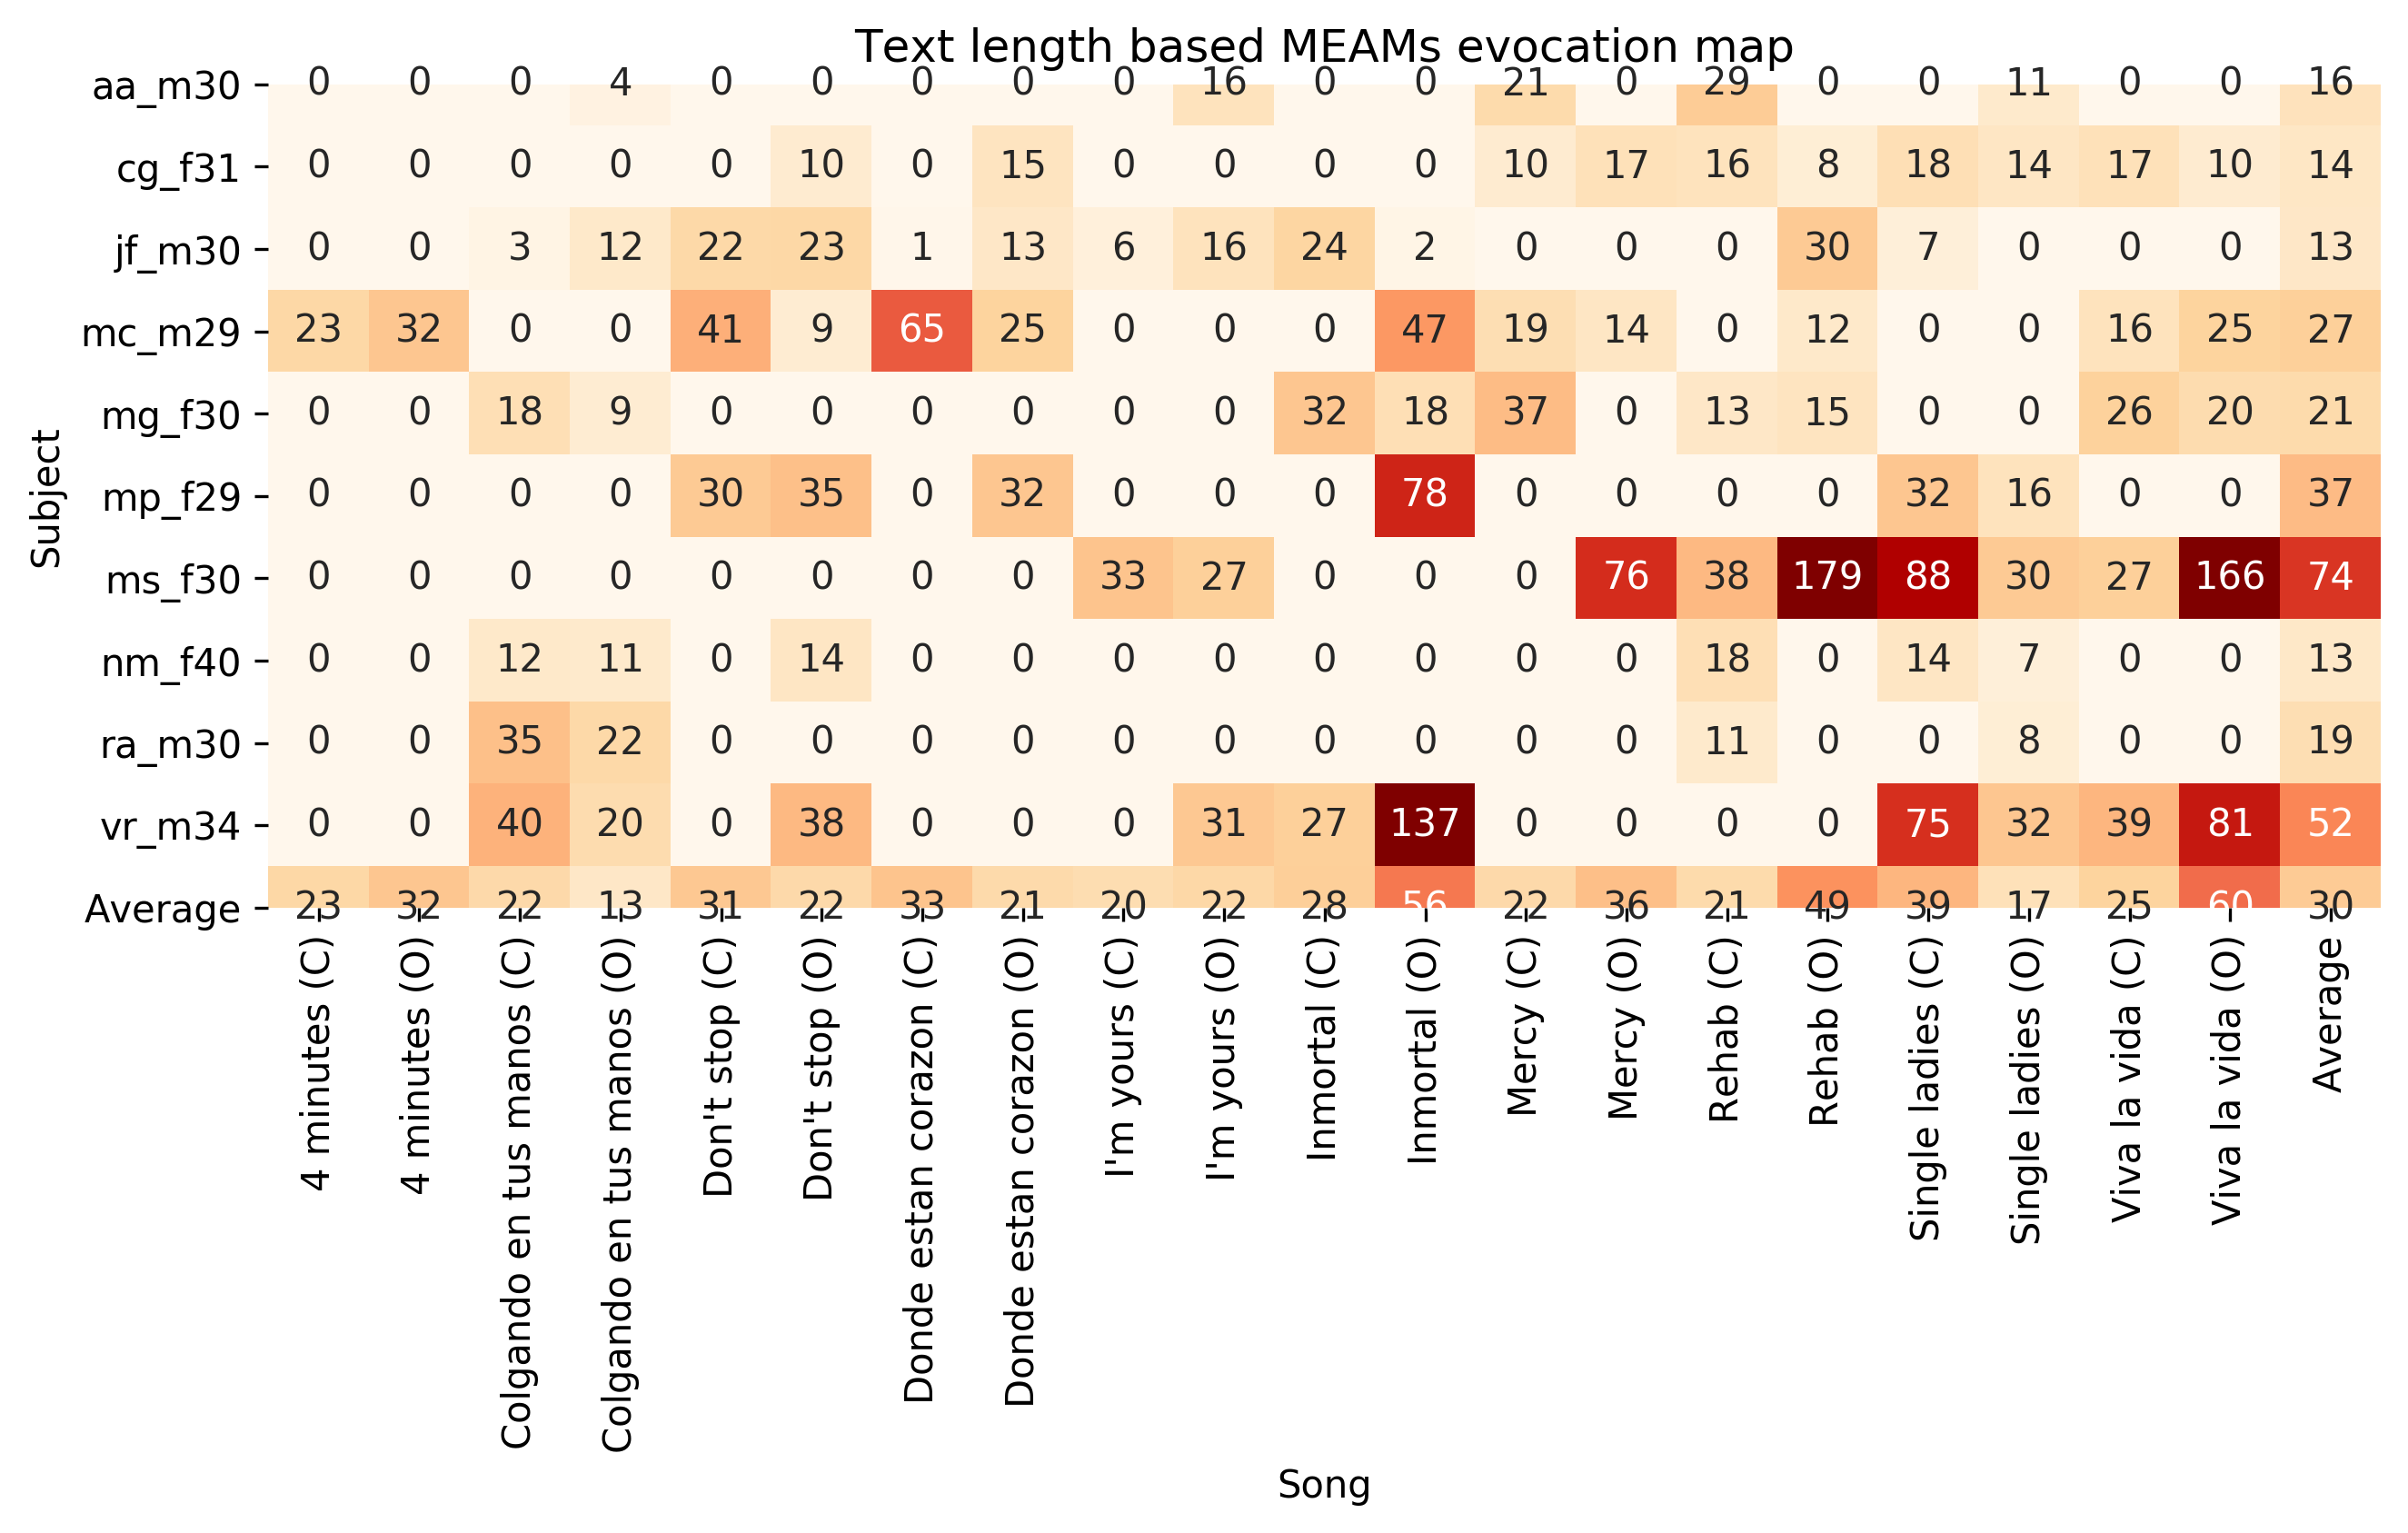

In [5]:
# obtains only columns with memories summarized by subject
df_meams_summary_by_text_length = pd.pivot_table(df_meams, index='subject', values='text_length', columns='song', aggfunc=np.mean, margins=True, margins_name='Average')

# fill NaNs with 0s
df_meams_summary_by_text_length = df_meams_summary_by_text_length.fillna(0)

# plot
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_text_length_heatmap = sns.heatmap(df_meams_summary_by_text_length, vmax=100, annot=True, cbar=False, cmap=color_map, fmt='.0f')
meams_summary_by_text_length_heatmap.set(xlabel='Song', ylabel='Subject', title='Text length based MEAMs evocation map')
plt.show()

## Time based MEAMs evocation map

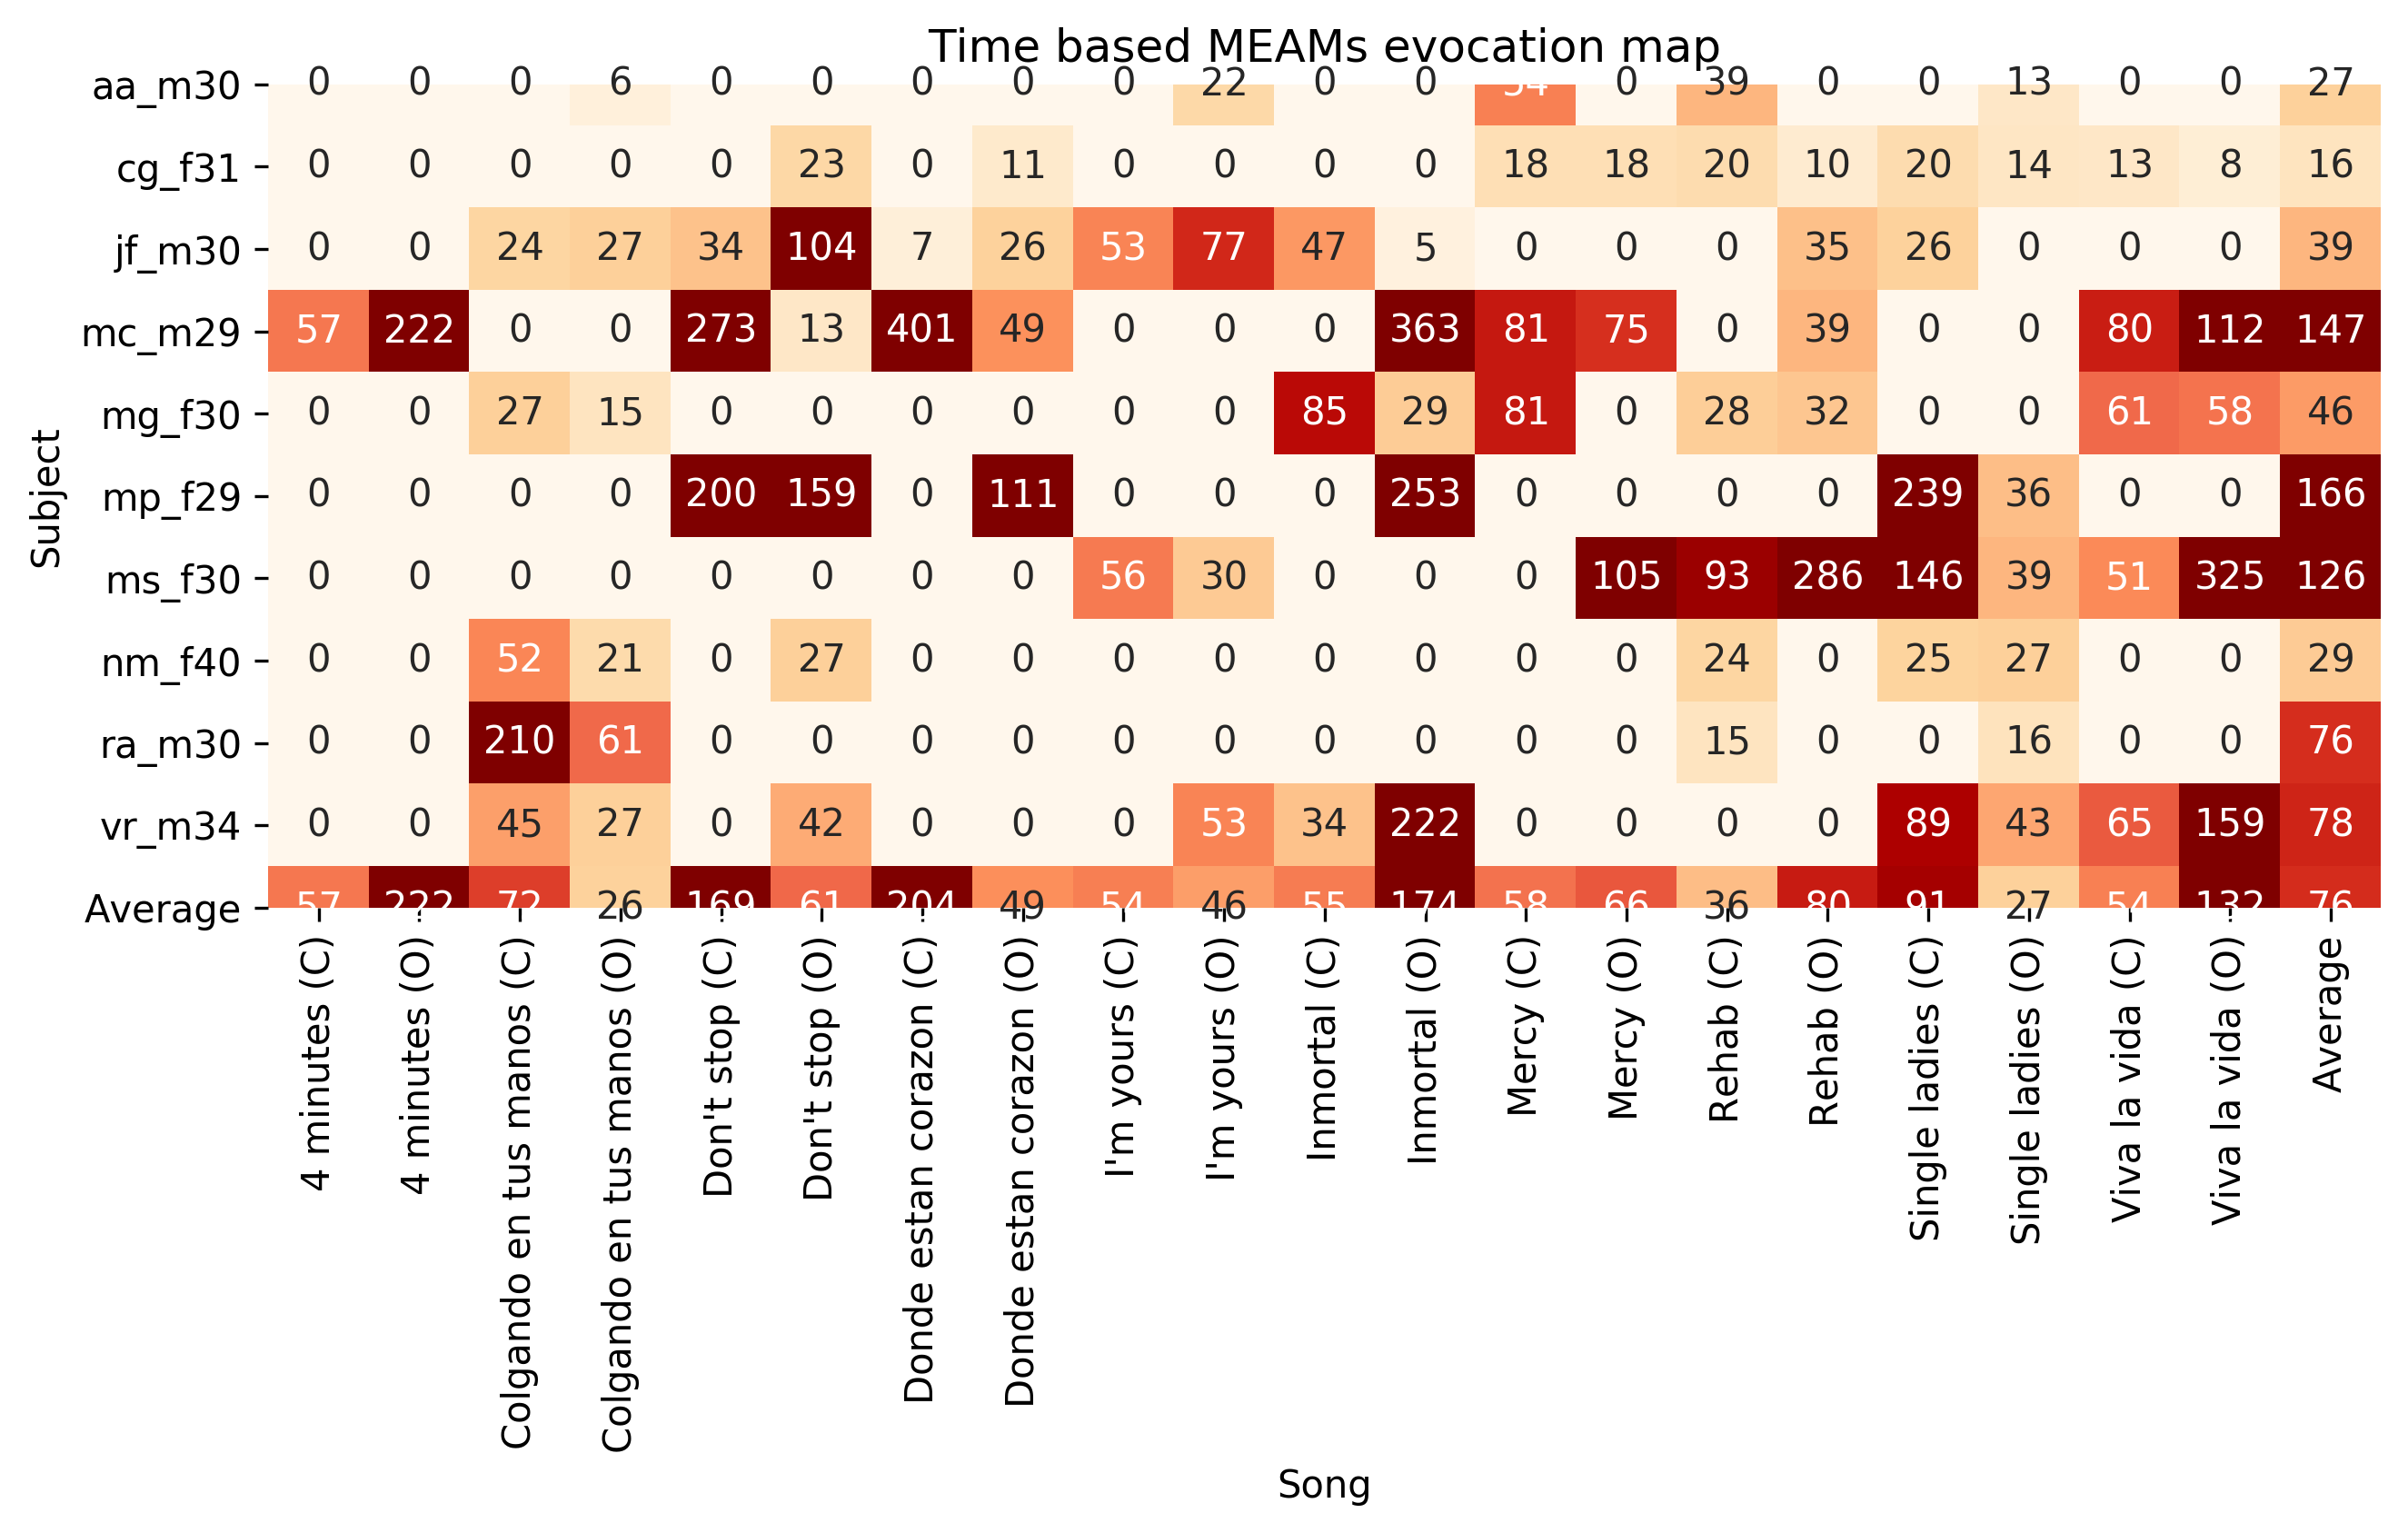

In [6]:
# obtains only columns with memories summarized by subject
df_meams_summary_by_writing_time = pd.pivot_table(df_meams, index='subject', values='writing_time', columns='song', aggfunc=np.mean, margins=True, margins_name='Average')

# fill NaNs with 0s
df_meams_summary_by_writing_time = df_meams_summary_by_writing_time.fillna(0)

# plot
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_writing_time_heatmap = sns.heatmap(df_meams_summary_by_writing_time, vmax=100, annot=True, cbar=False, cmap=color_map, fmt='.0f')
meams_summary_by_writing_time_heatmap.set(xlabel='Song', ylabel='Subject', title='Time based MEAMs evocation map')
plt.show()

## Memory pair similarity summary

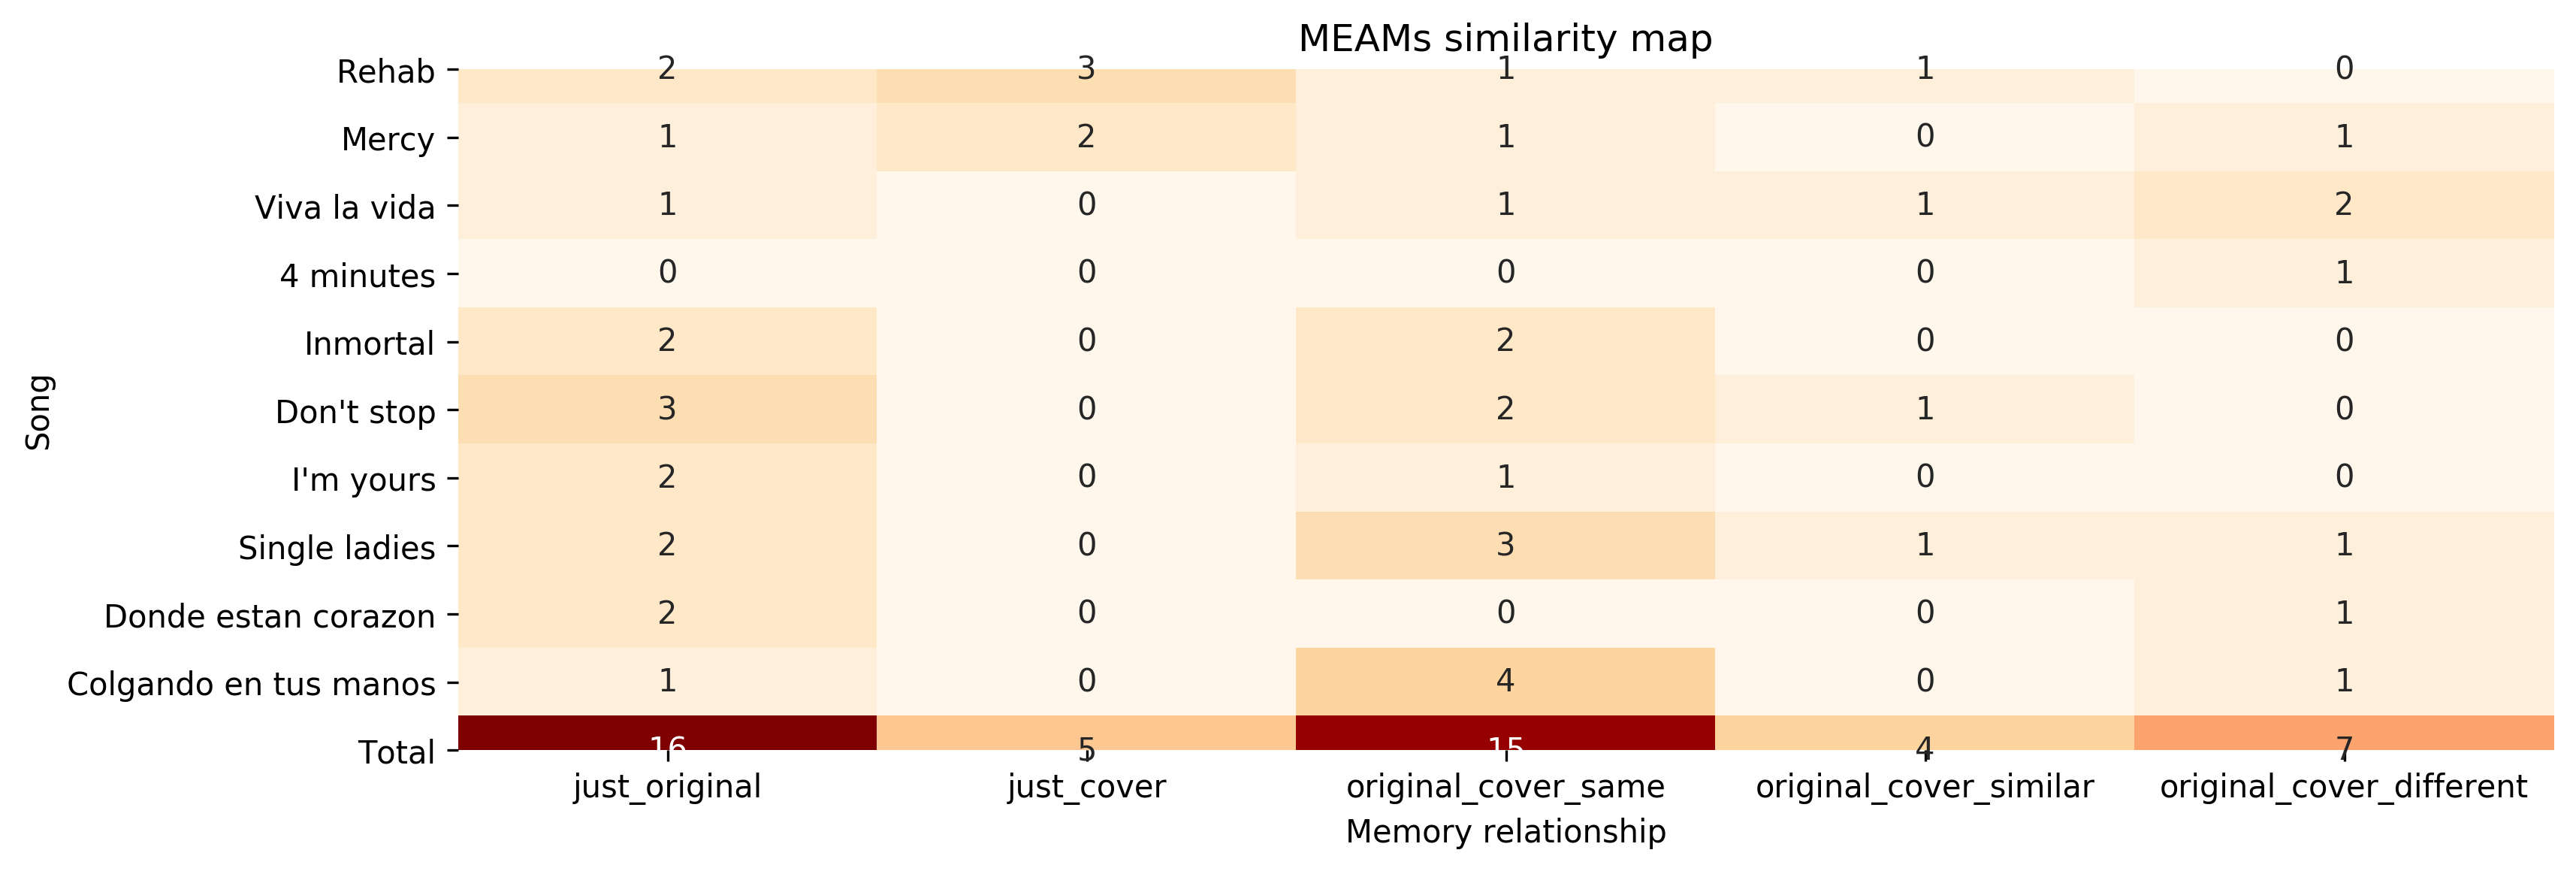

In [7]:
# create empty data frame
df_memory_similarity_summary = pd.DataFrame()
memory_pair_types = ['just_original', 
                     'just_cover', 
                     'original_cover_same', 
                     'original_cover_similar',
                     'original_cover_different']


# search and sums each memory_pair_type present in df_memory_similarity_data
for memory_pair_type in memory_pair_types:
    df_memory_similarity_summary = df_memory_similarity_summary.append(df_memory_similarity_data.eq(memory_pair_type).sum().to_frame().T)
    
# addiitonal adjustments
df_memory_similarity_summary.rename(columns=song_names, inplace=True)
del df_memory_similarity_summary['subject']
df_memory_similarity_summary['Total'] = df_memory_similarity_summary.sum(axis=1)
    
# generate heatmap
fig, axs = plt.subplots(figsize=(12,4), dpi=300)
memory_similarity_heatmap = sns.heatmap(df_memory_similarity_summary.T, cmap=color_map, annot=True, cbar=False, xticklabels=memory_pair_types)
memory_similarity_heatmap.set(xlabel='Memory relationship', ylabel='Song', title='MEAMs similarity map')
plt.show()

## MEAMs valence and arousal linking in original vs covers

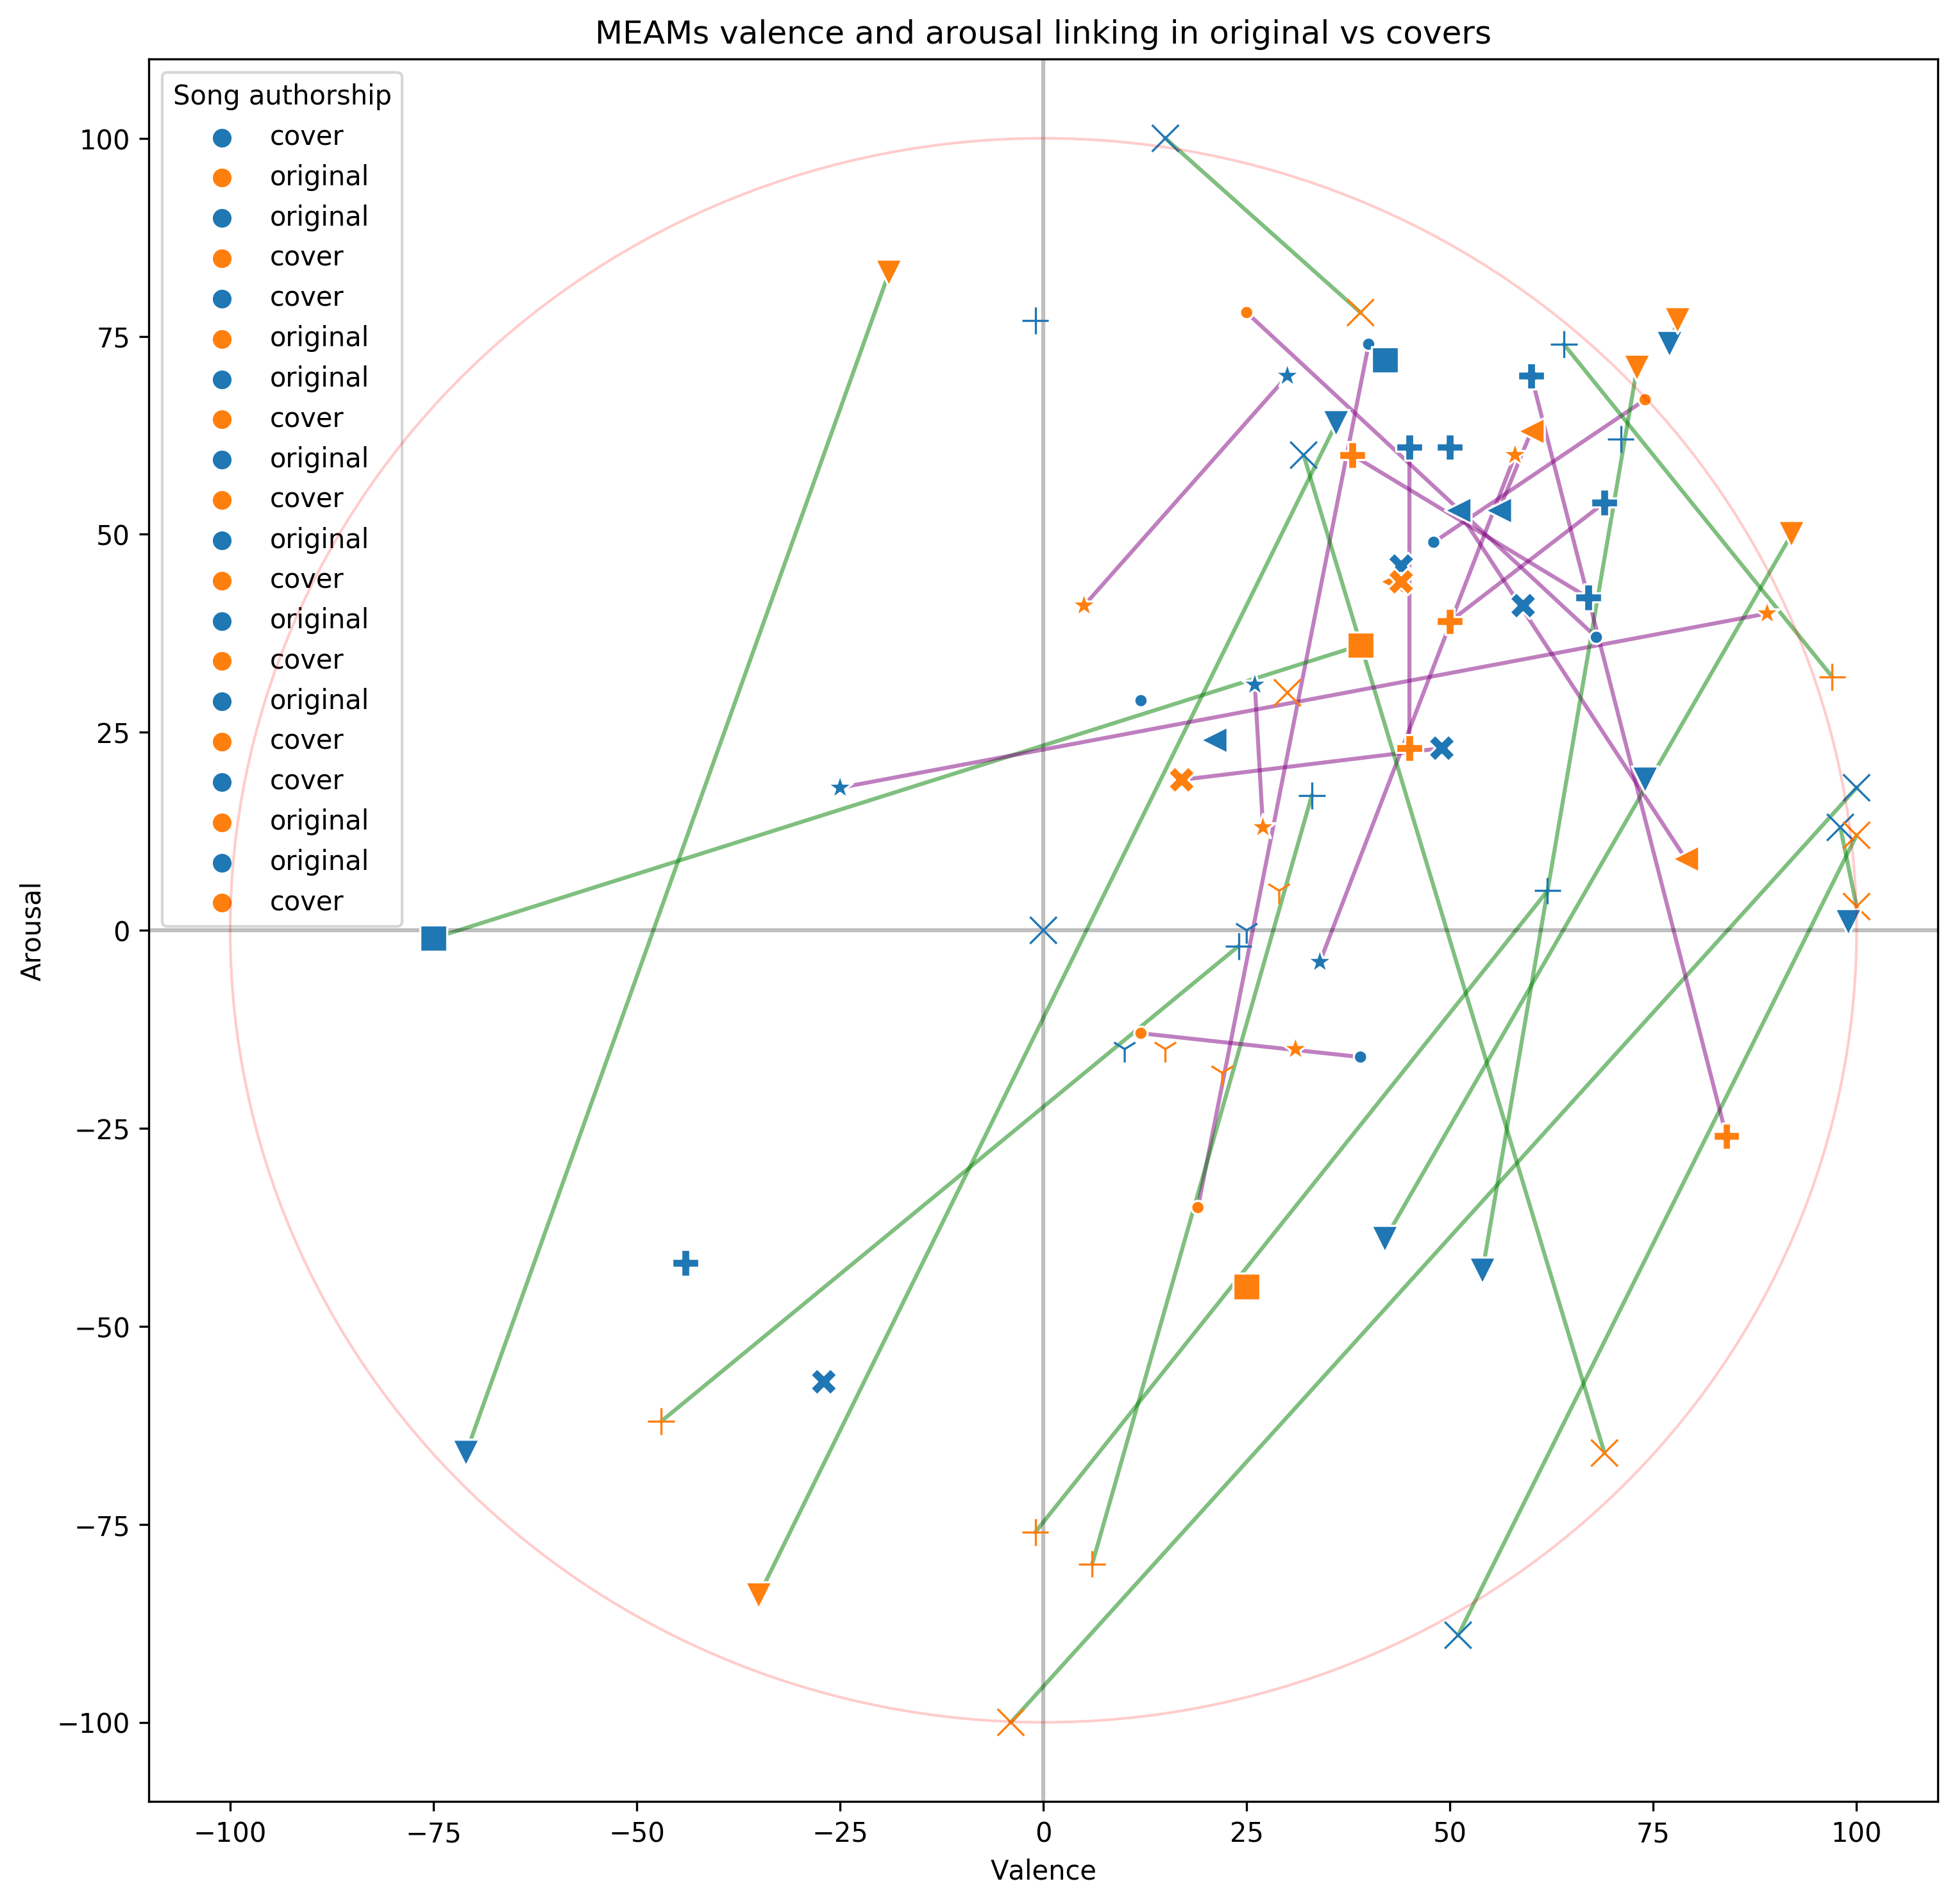

In [25]:
# obtains only columns with valence and arousal and truncate song string names
df_meams_valence_arousal = df_meams[['subject', 'song', 'song_authorship', 'valence', 'arousal', 'sex']].copy()
df_meams_valence_arousal['song'] = df_meams_valence_arousal['song'].apply(lambda song: song[:-4])

subject_names_to_dot_style = {
'aa_m30': '1',
'mg_f30': '*',
'nm_f40': '<',
'vr_m34': '+',
'jf_m30': 'x',
'mp_f29': 'X',
'ms_f30': '.',
'mc_m29': 'v',
'ra_m30': 's',
'cg_f31': 'P'
}



fig, axs = plt.subplots(figsize=(12, 12), dpi=300)
axs.set_xlim([-110, 110])
axs.set_ylim([-110, 110])

for name, dotstyle in subject_names_to_dot_style.items():
    to_plot = df_meams_valence_arousal.loc[df_meams_valence_arousal['subject'] == name]
    meams_valence_arousal_scatter = sns.scatterplot(data=to_plot, x='valence', y='arousal', 
                                                    hue='song_authorship', s=100, marker = dotstyle)
# old version
# meams_valence_arousal_scatter = sns.scatterplot(data=meams_valence_arousal_scatter, x='valence', y='arousal', 
#                                                    hue='song_authorship', s=100)


# find original and cover links
for idx, memory in df_meams_valence_arousal.iterrows():
    if memory['song_authorship'] == 'original':
        destination = df_meams_valence_arousal.loc[(df_meams_valence_arousal['song'] == memory['song']) & (df_meams_valence_arousal['song_authorship'] == 'cover') & (df_meams_valence_arousal['subject'] == memory['subject'])]
        
        if destination['valence'].values.size > 0:
            link_color = 'purple' if memory['sex'] == 'F' else 'green'
            meams_valence_arousal_scatter.plot([memory['valence'], destination['valence'].values[0]], [memory['arousal'], destination['arousal'].values[0]], color=link_color, alpha=0.5, zorder=0)

# plot valence arousal polar plane
valence_arousal_edges = Circle((0, 0), 100, facecolor='None', edgecolor='red', lw=1, zorder=10, alpha=0.2)
axs.add_patch(valence_arousal_edges)
axs.set_title('MEAMs valence and arousal linking in original vs covers')
axs.set_xlabel('Valence')
axs.set_ylabel('Arousal')
axs.legend(title='Song authorship')

# plot grid
axs.axhline(y=0.0, color = 'black', zorder=0, alpha=0.25)
axs.axvline(x=0.0, color = 'black', zorder=0, alpha=0.25)
plt.show()

## Relationship with MEAMs songs

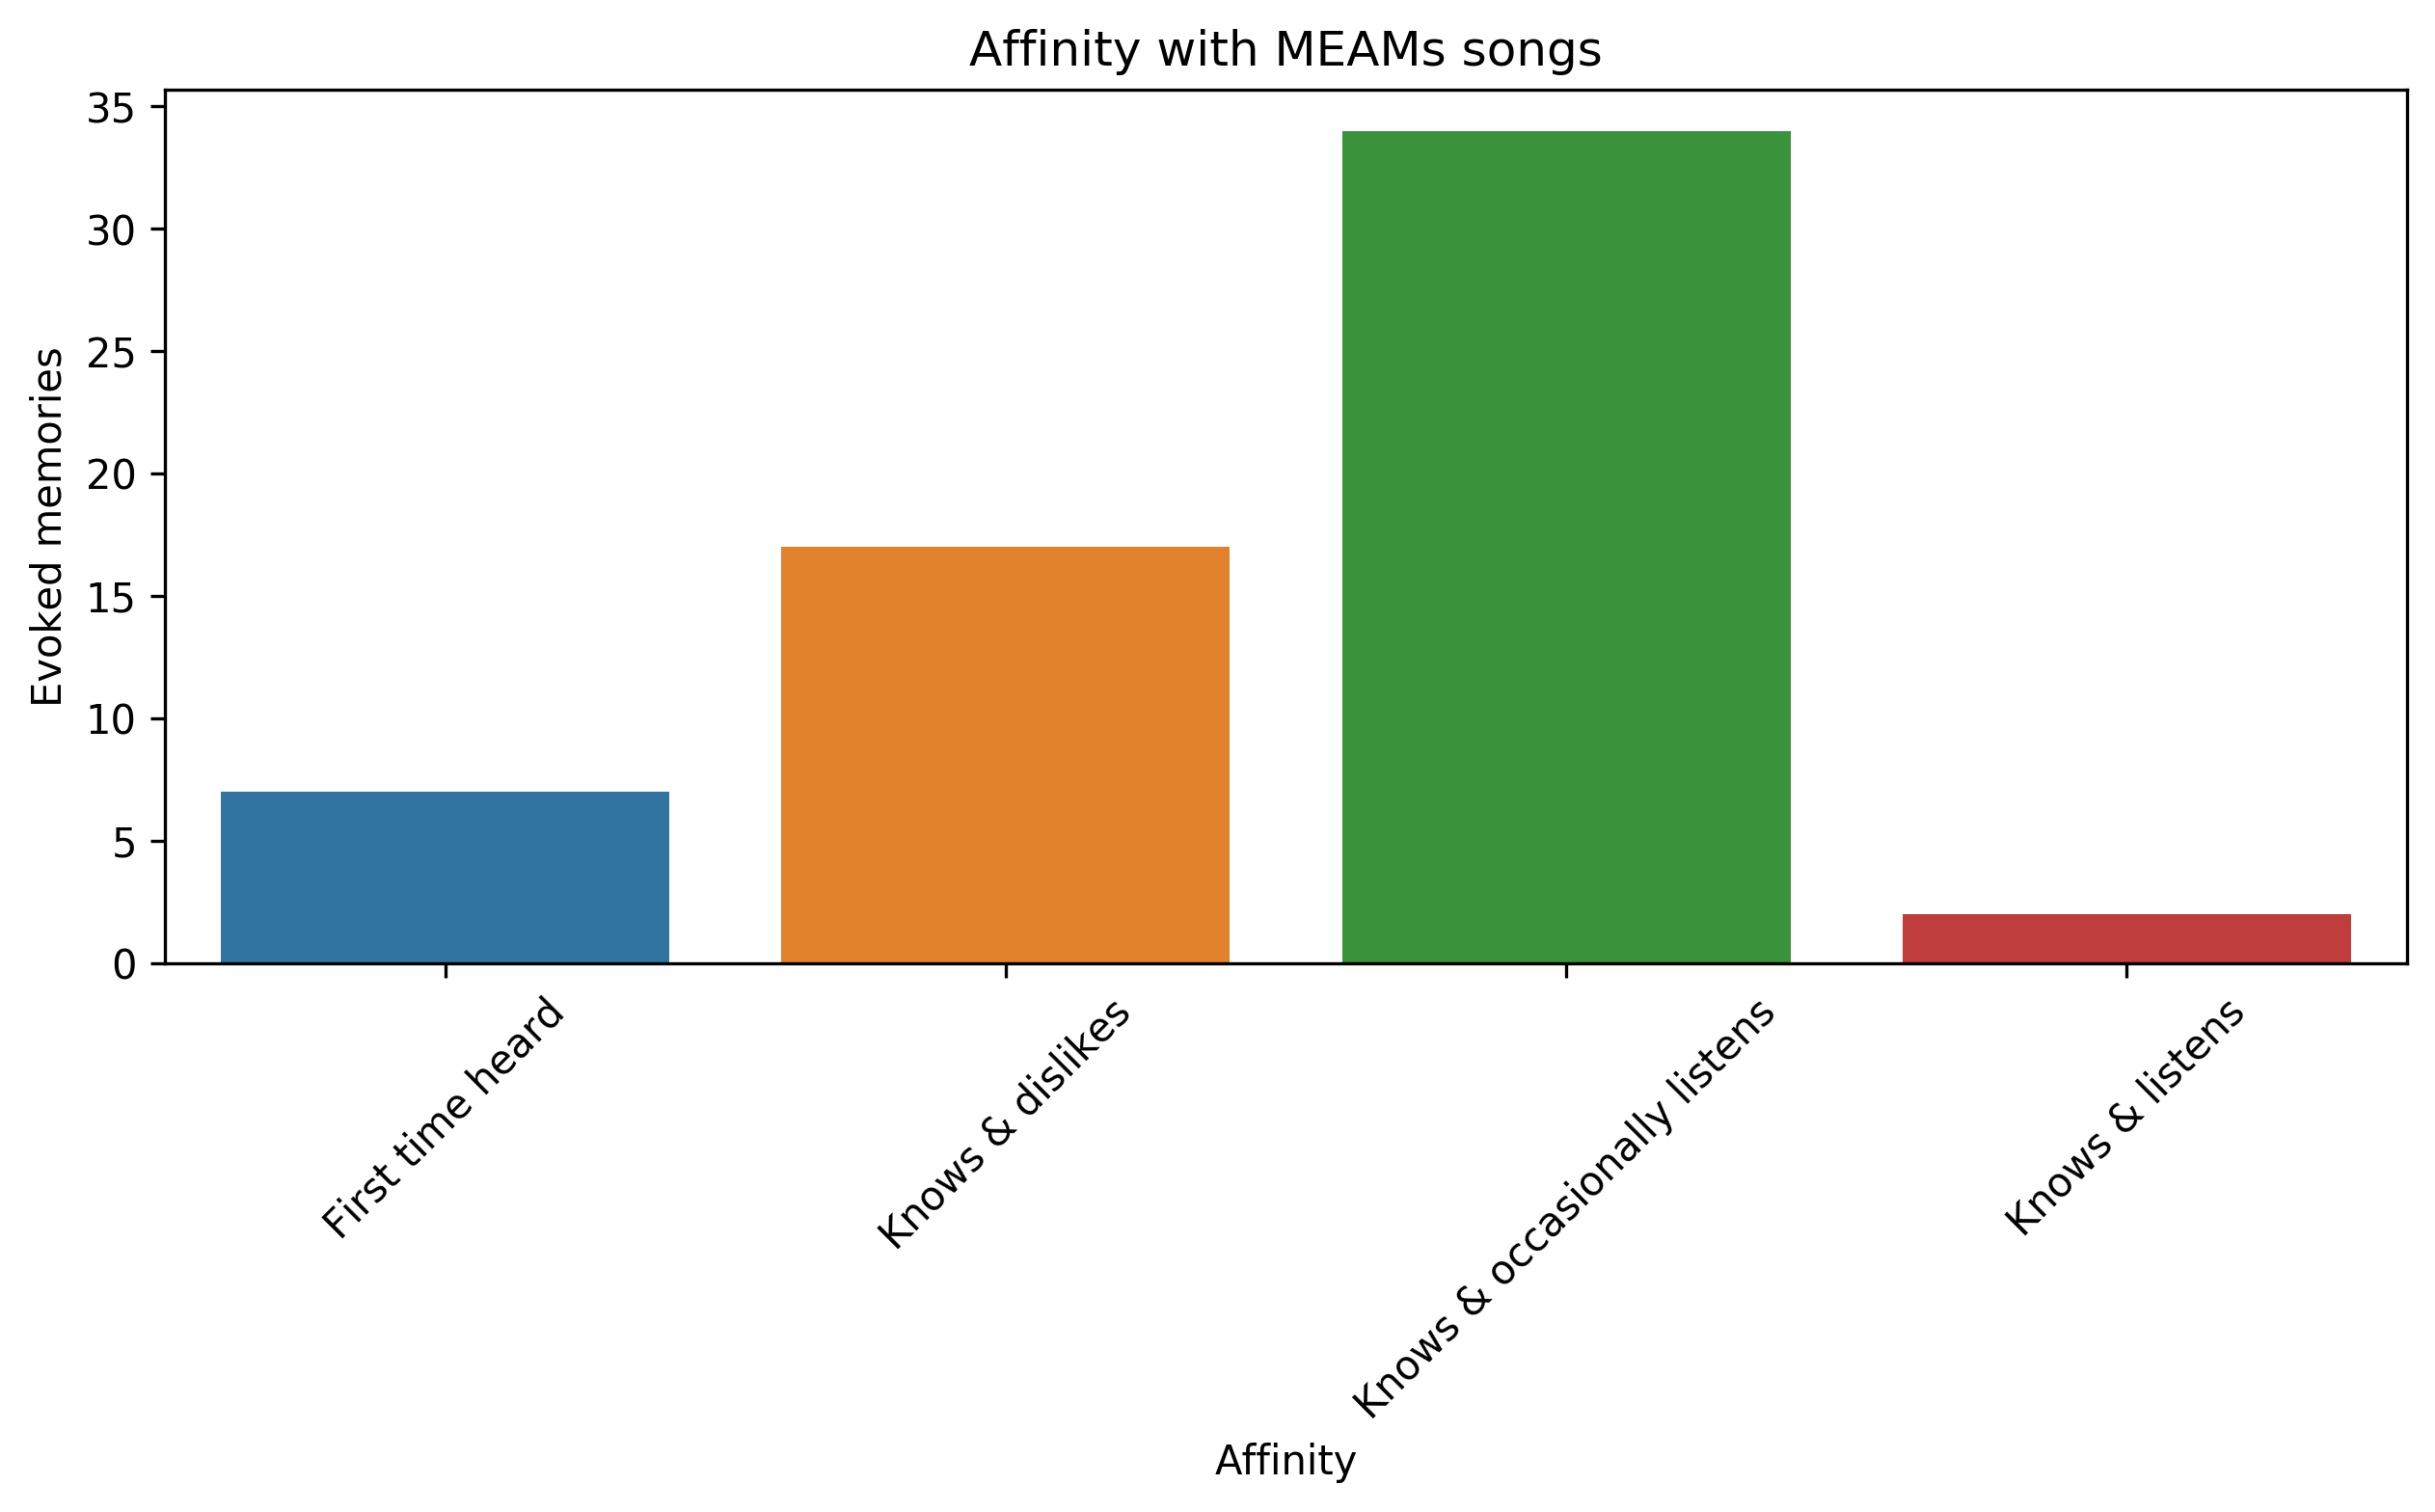

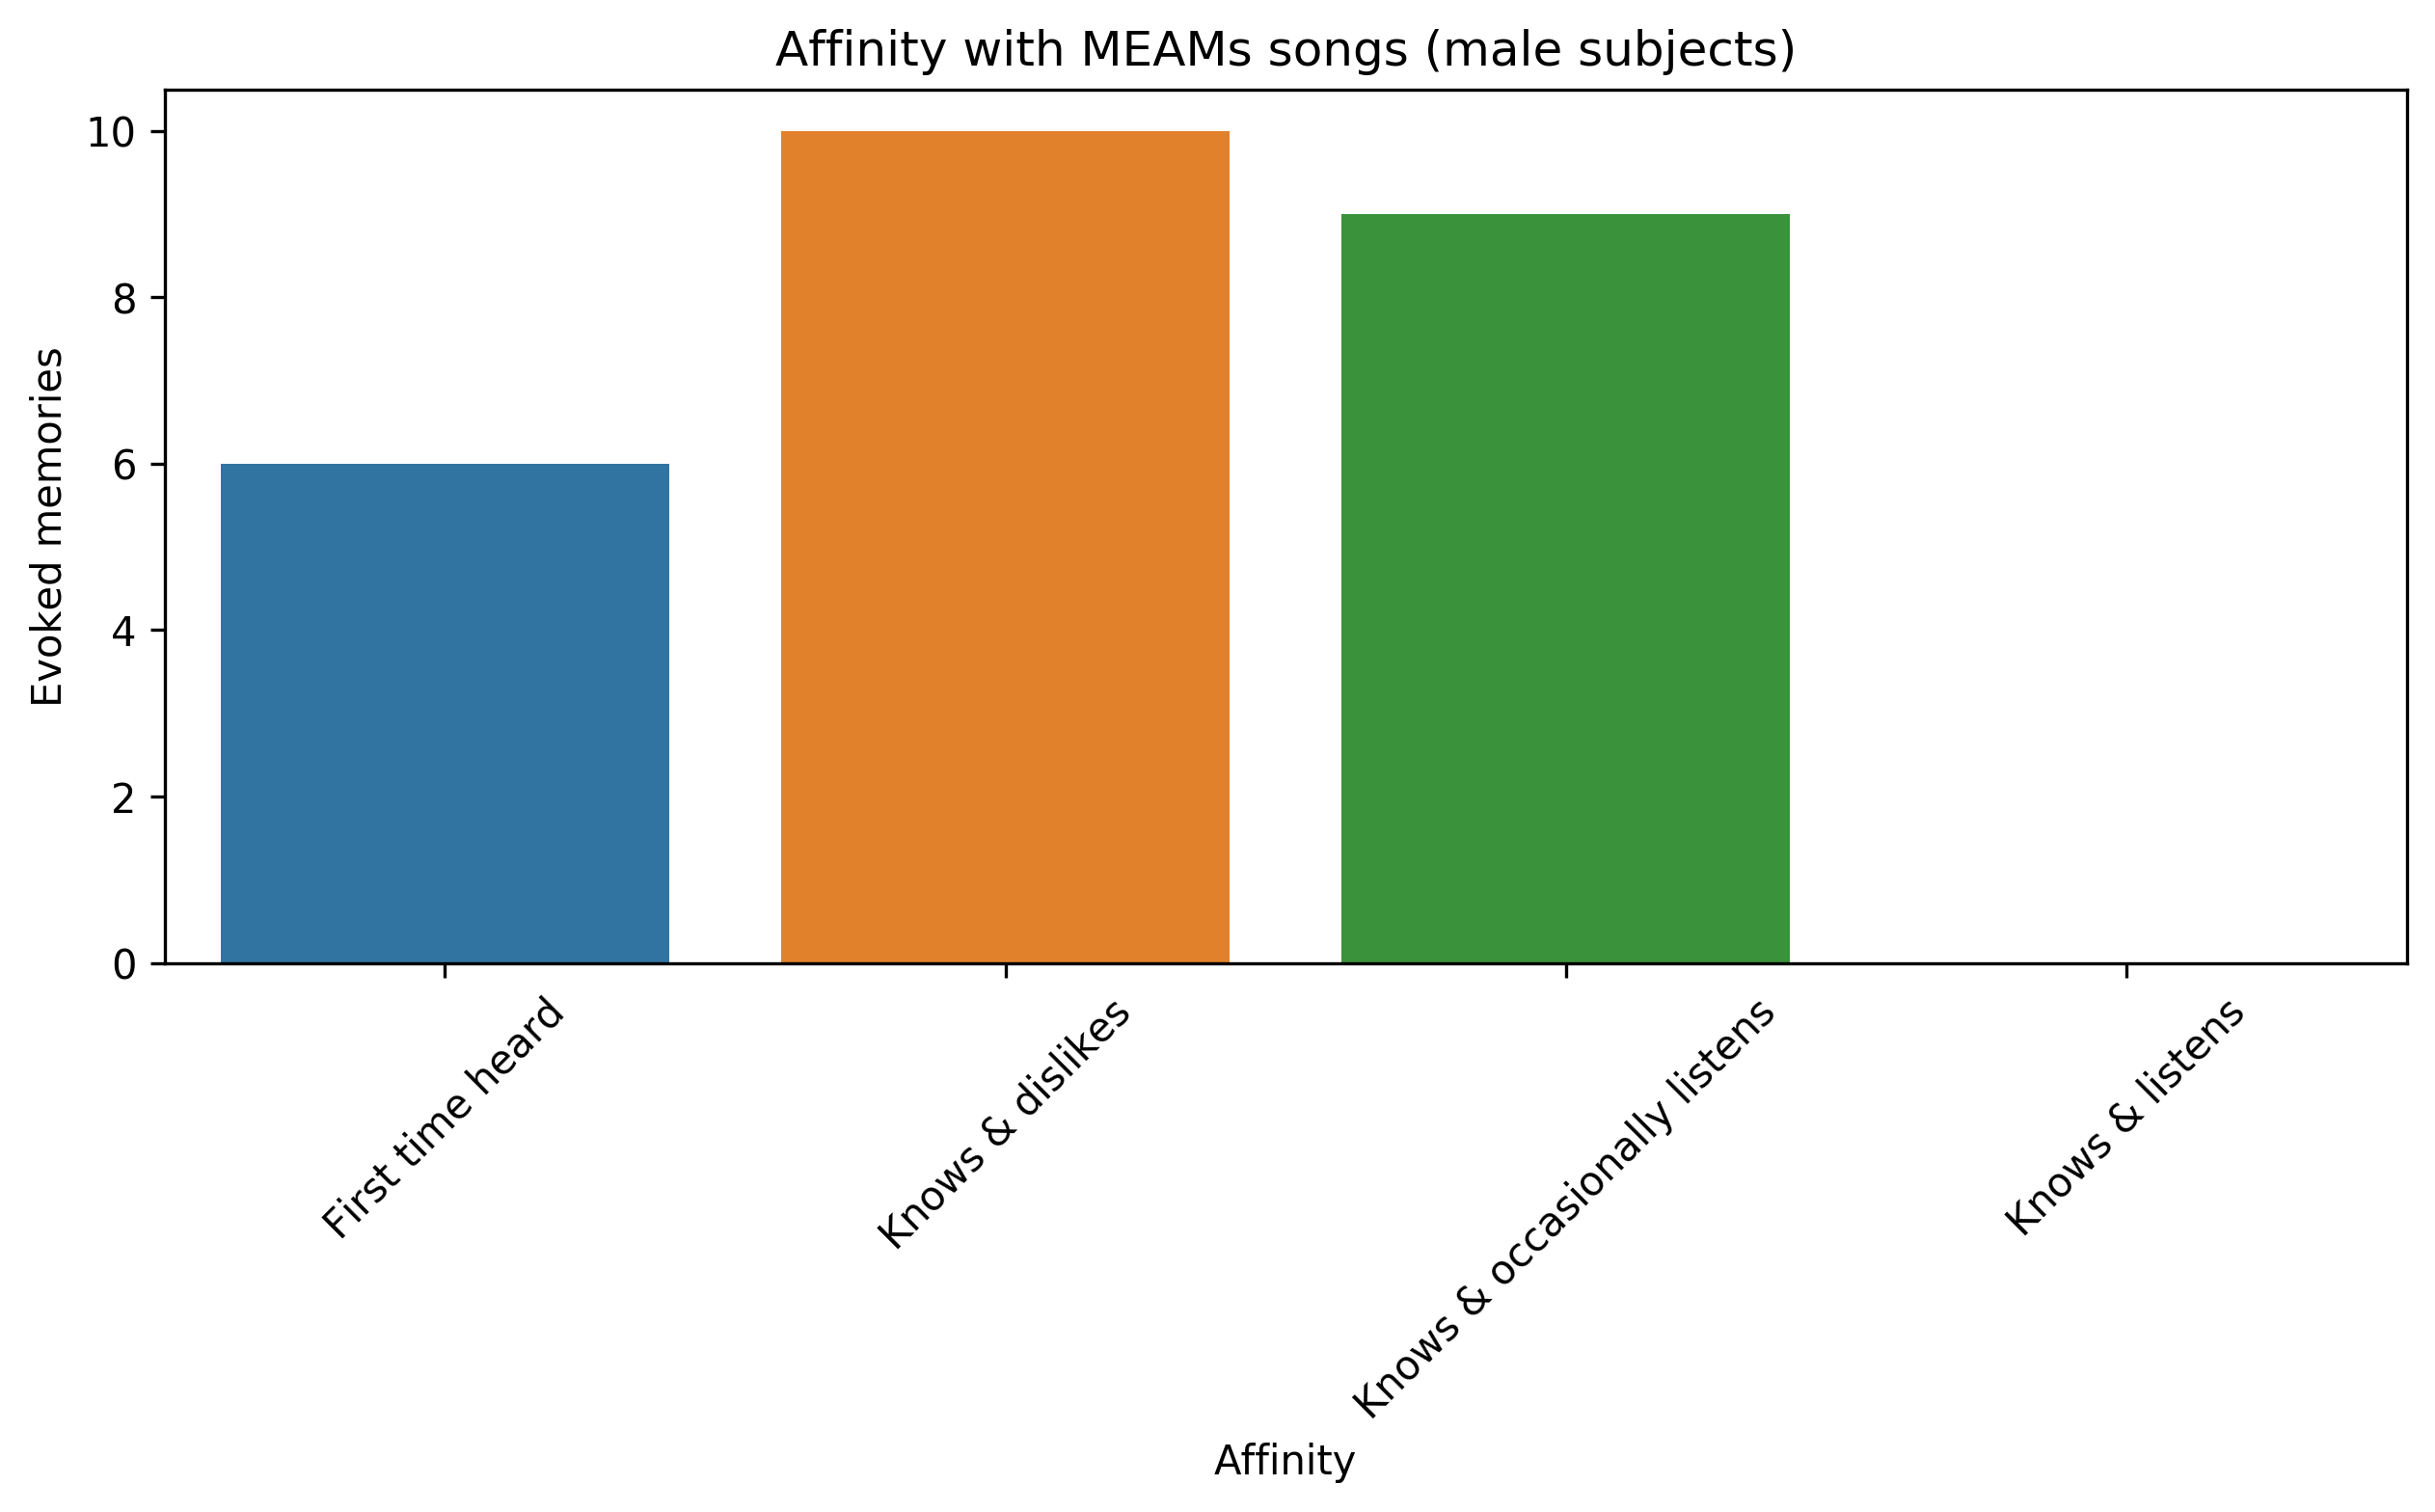

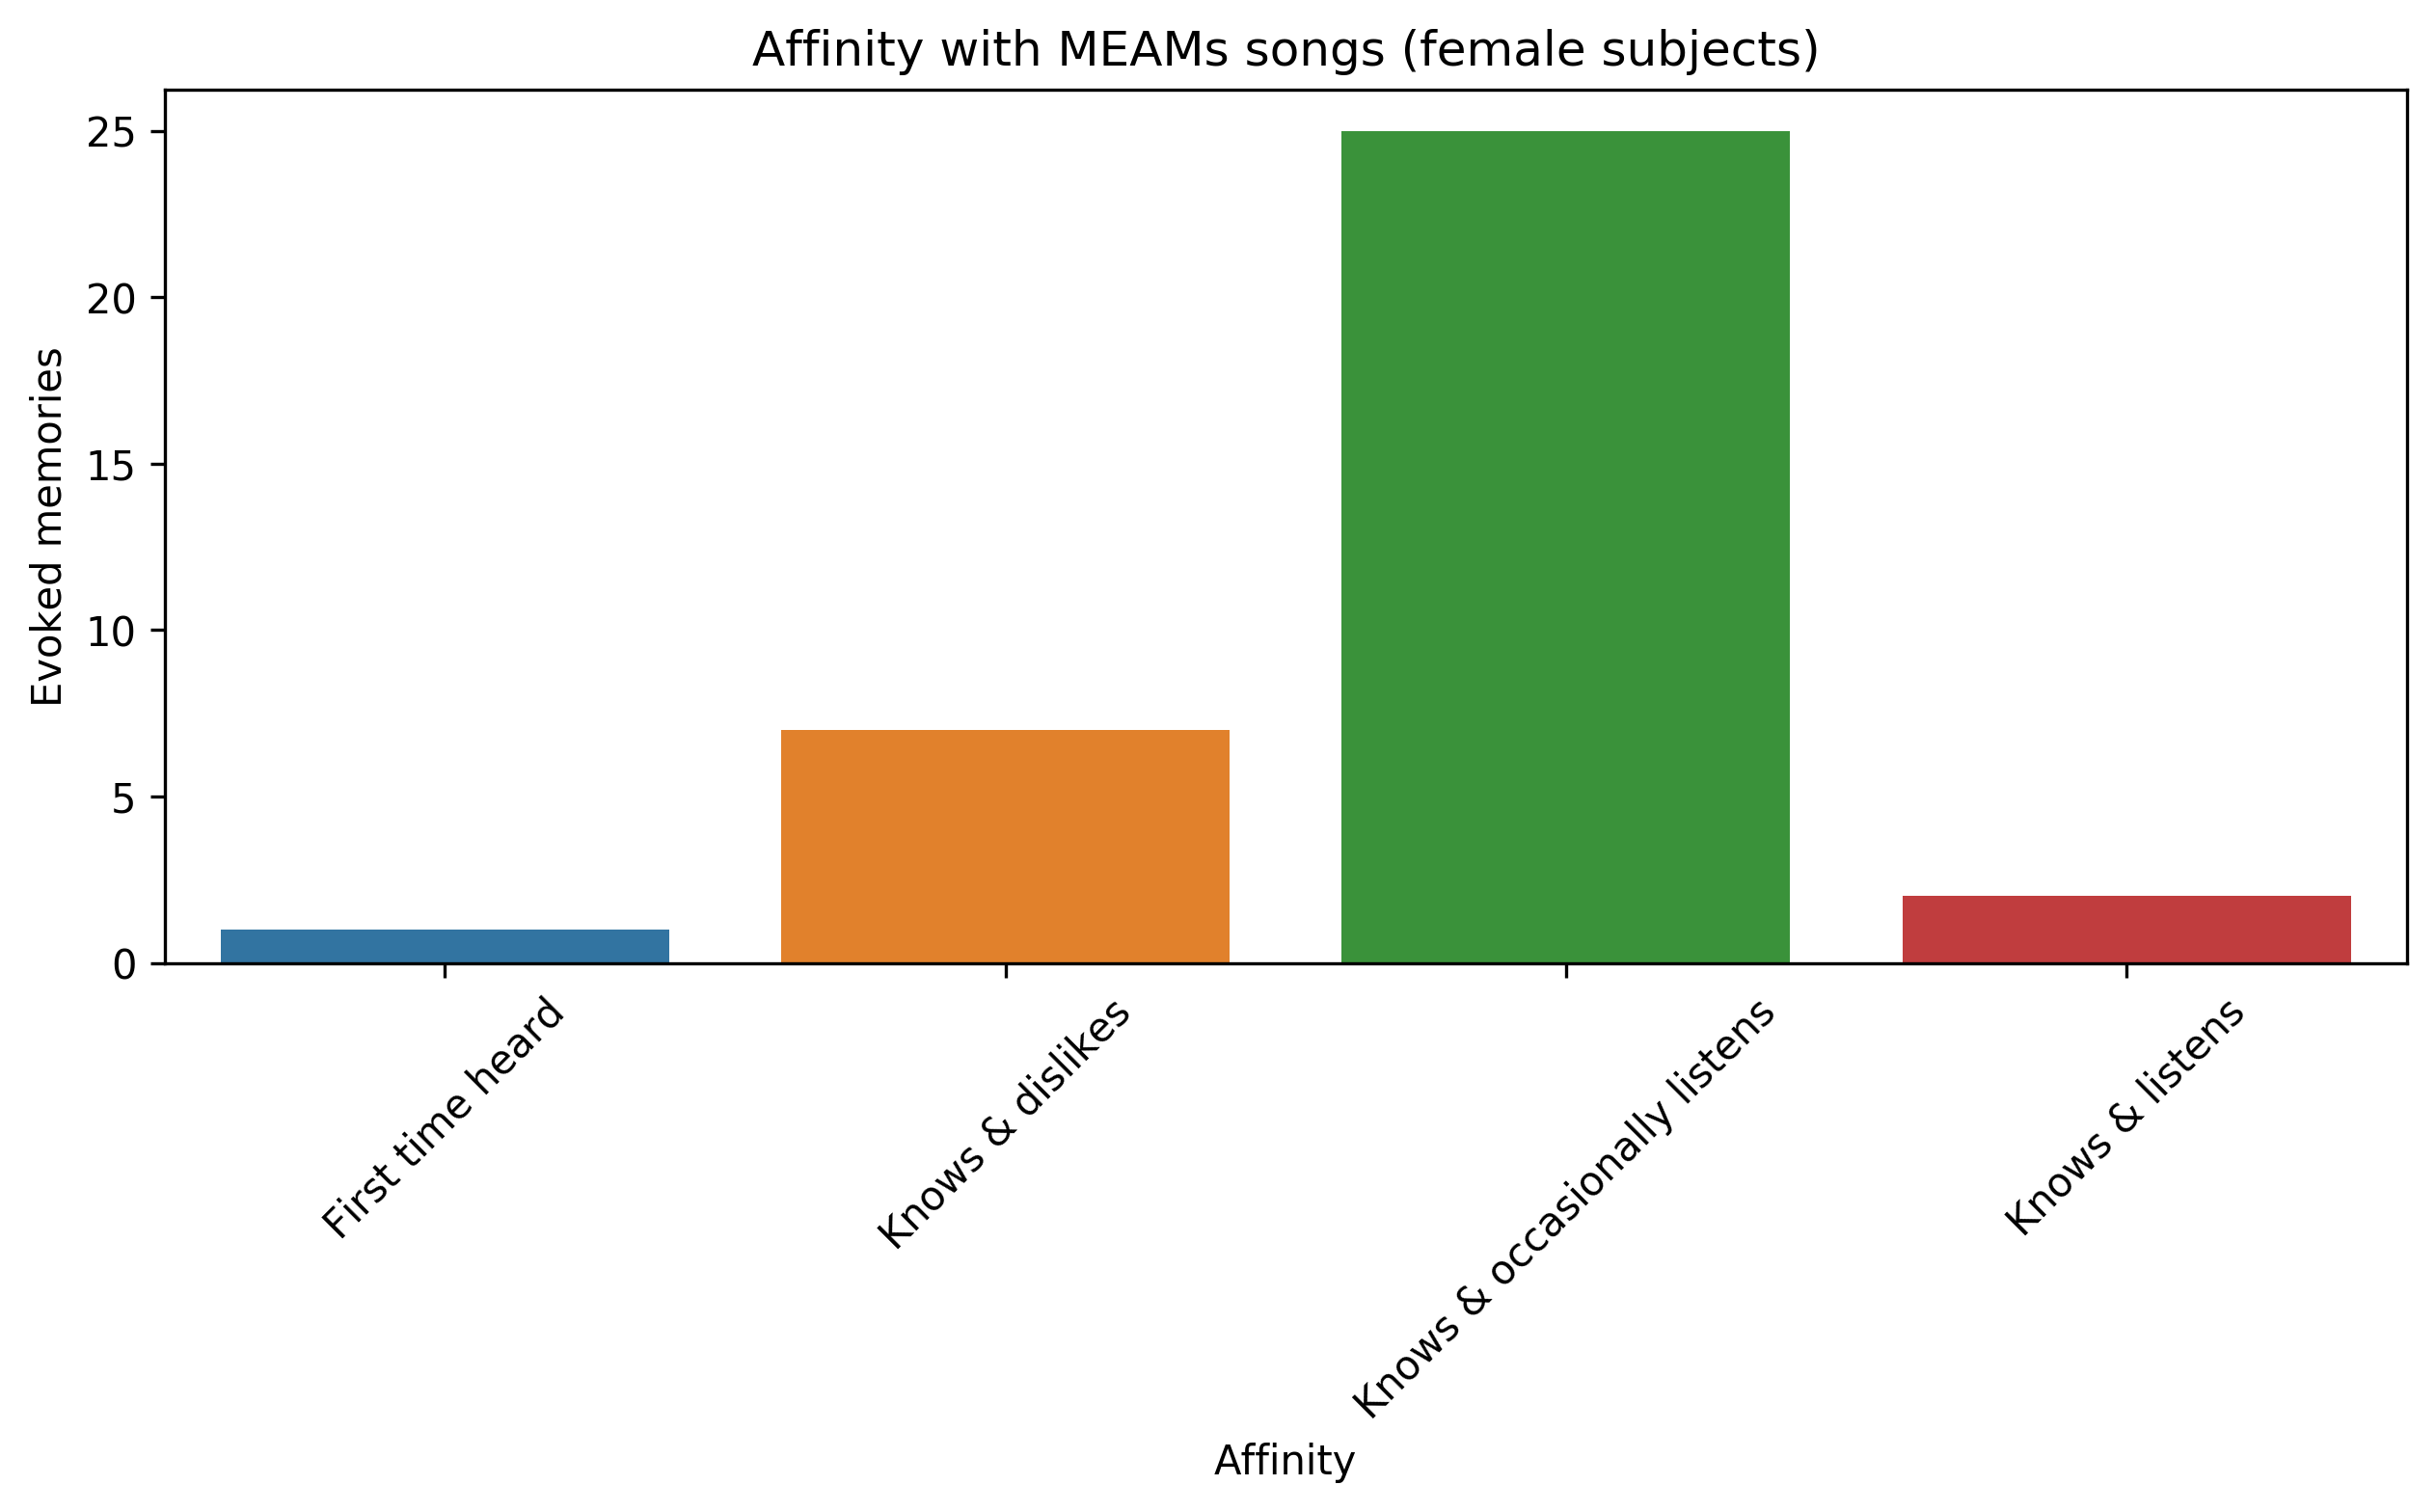

In [9]:
# obstains only columns with memories summarized by knowledge
df_meams_summary_by_knowledge = df_meams[['knowledge_first-time-heard', 
                                       'knowledge_knows-and-dislike', 
                                       'knowledge_knows-and-ocassionally-listens',
                                       'knowledge_knows-and-listens',
                                        'sex']].copy()


# organise by knowledge and discovery source
df_meams_summary_by_knowledge_all = df_meams_summary_by_knowledge.sum().to_frame().transpose()

# replace discovery descriptors
df_meams_summary_by_knowledge_all.rename(columns=discovery_descriptors, inplace=True)

# plot by knowledge
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_knowledge_barplot = sns.barplot(data=df_meams_summary_by_knowledge_all, ci=None)
meams_summary_by_knowledge_barplot.set(xlabel='Affinity', ylabel='Evoked memories', title='Affinity with MEAMs songs')
plt.xticks(rotation=45)
plt.show()

# organise by knowledge and discovery source for male subjects only
df_meams_summary_by_knowledge_m = df_meams_summary_by_knowledge.loc[df_meams_summary_by_knowledge['sex'] == 'M']
df_meams_summary_by_knowledge_m = df_meams_summary_by_knowledge_m.sum().to_frame().transpose()

# replace discovery descriptors
df_meams_summary_by_knowledge_m.rename(columns=discovery_descriptors, inplace=True)

# plot by knowledge
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_knowledge_barplot_m = sns.barplot(data=df_meams_summary_by_knowledge_m, ci=None)
meams_summary_by_knowledge_barplot_m.set(xlabel='Affinity', ylabel='Evoked memories', title='Affinity with MEAMs songs (male subjects)')
plt.xticks(rotation=45)
plt.show()

# organise by knowledge and discovery source for female subjects only
df_meams_summary_by_knowledge_f = df_meams_summary_by_knowledge.loc[df_meams_summary_by_knowledge['sex'] == 'F']
df_meams_summary_by_knowledge_f = df_meams_summary_by_knowledge_f.sum().to_frame().transpose()

# replace discovery descriptors
df_meams_summary_by_knowledge_f.rename(columns=discovery_descriptors, inplace=True)

# plot by knowledge
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_knowledge_barplot_f = sns.barplot(data=df_meams_summary_by_knowledge_f, ci=None)
meams_summary_by_knowledge_barplot_f.set(xlabel='Affinity', ylabel='Evoked memories', title='Affinity with MEAMs songs (female subjects)')
plt.xticks(rotation=45)
plt.show()

## Source of MEAMs songs

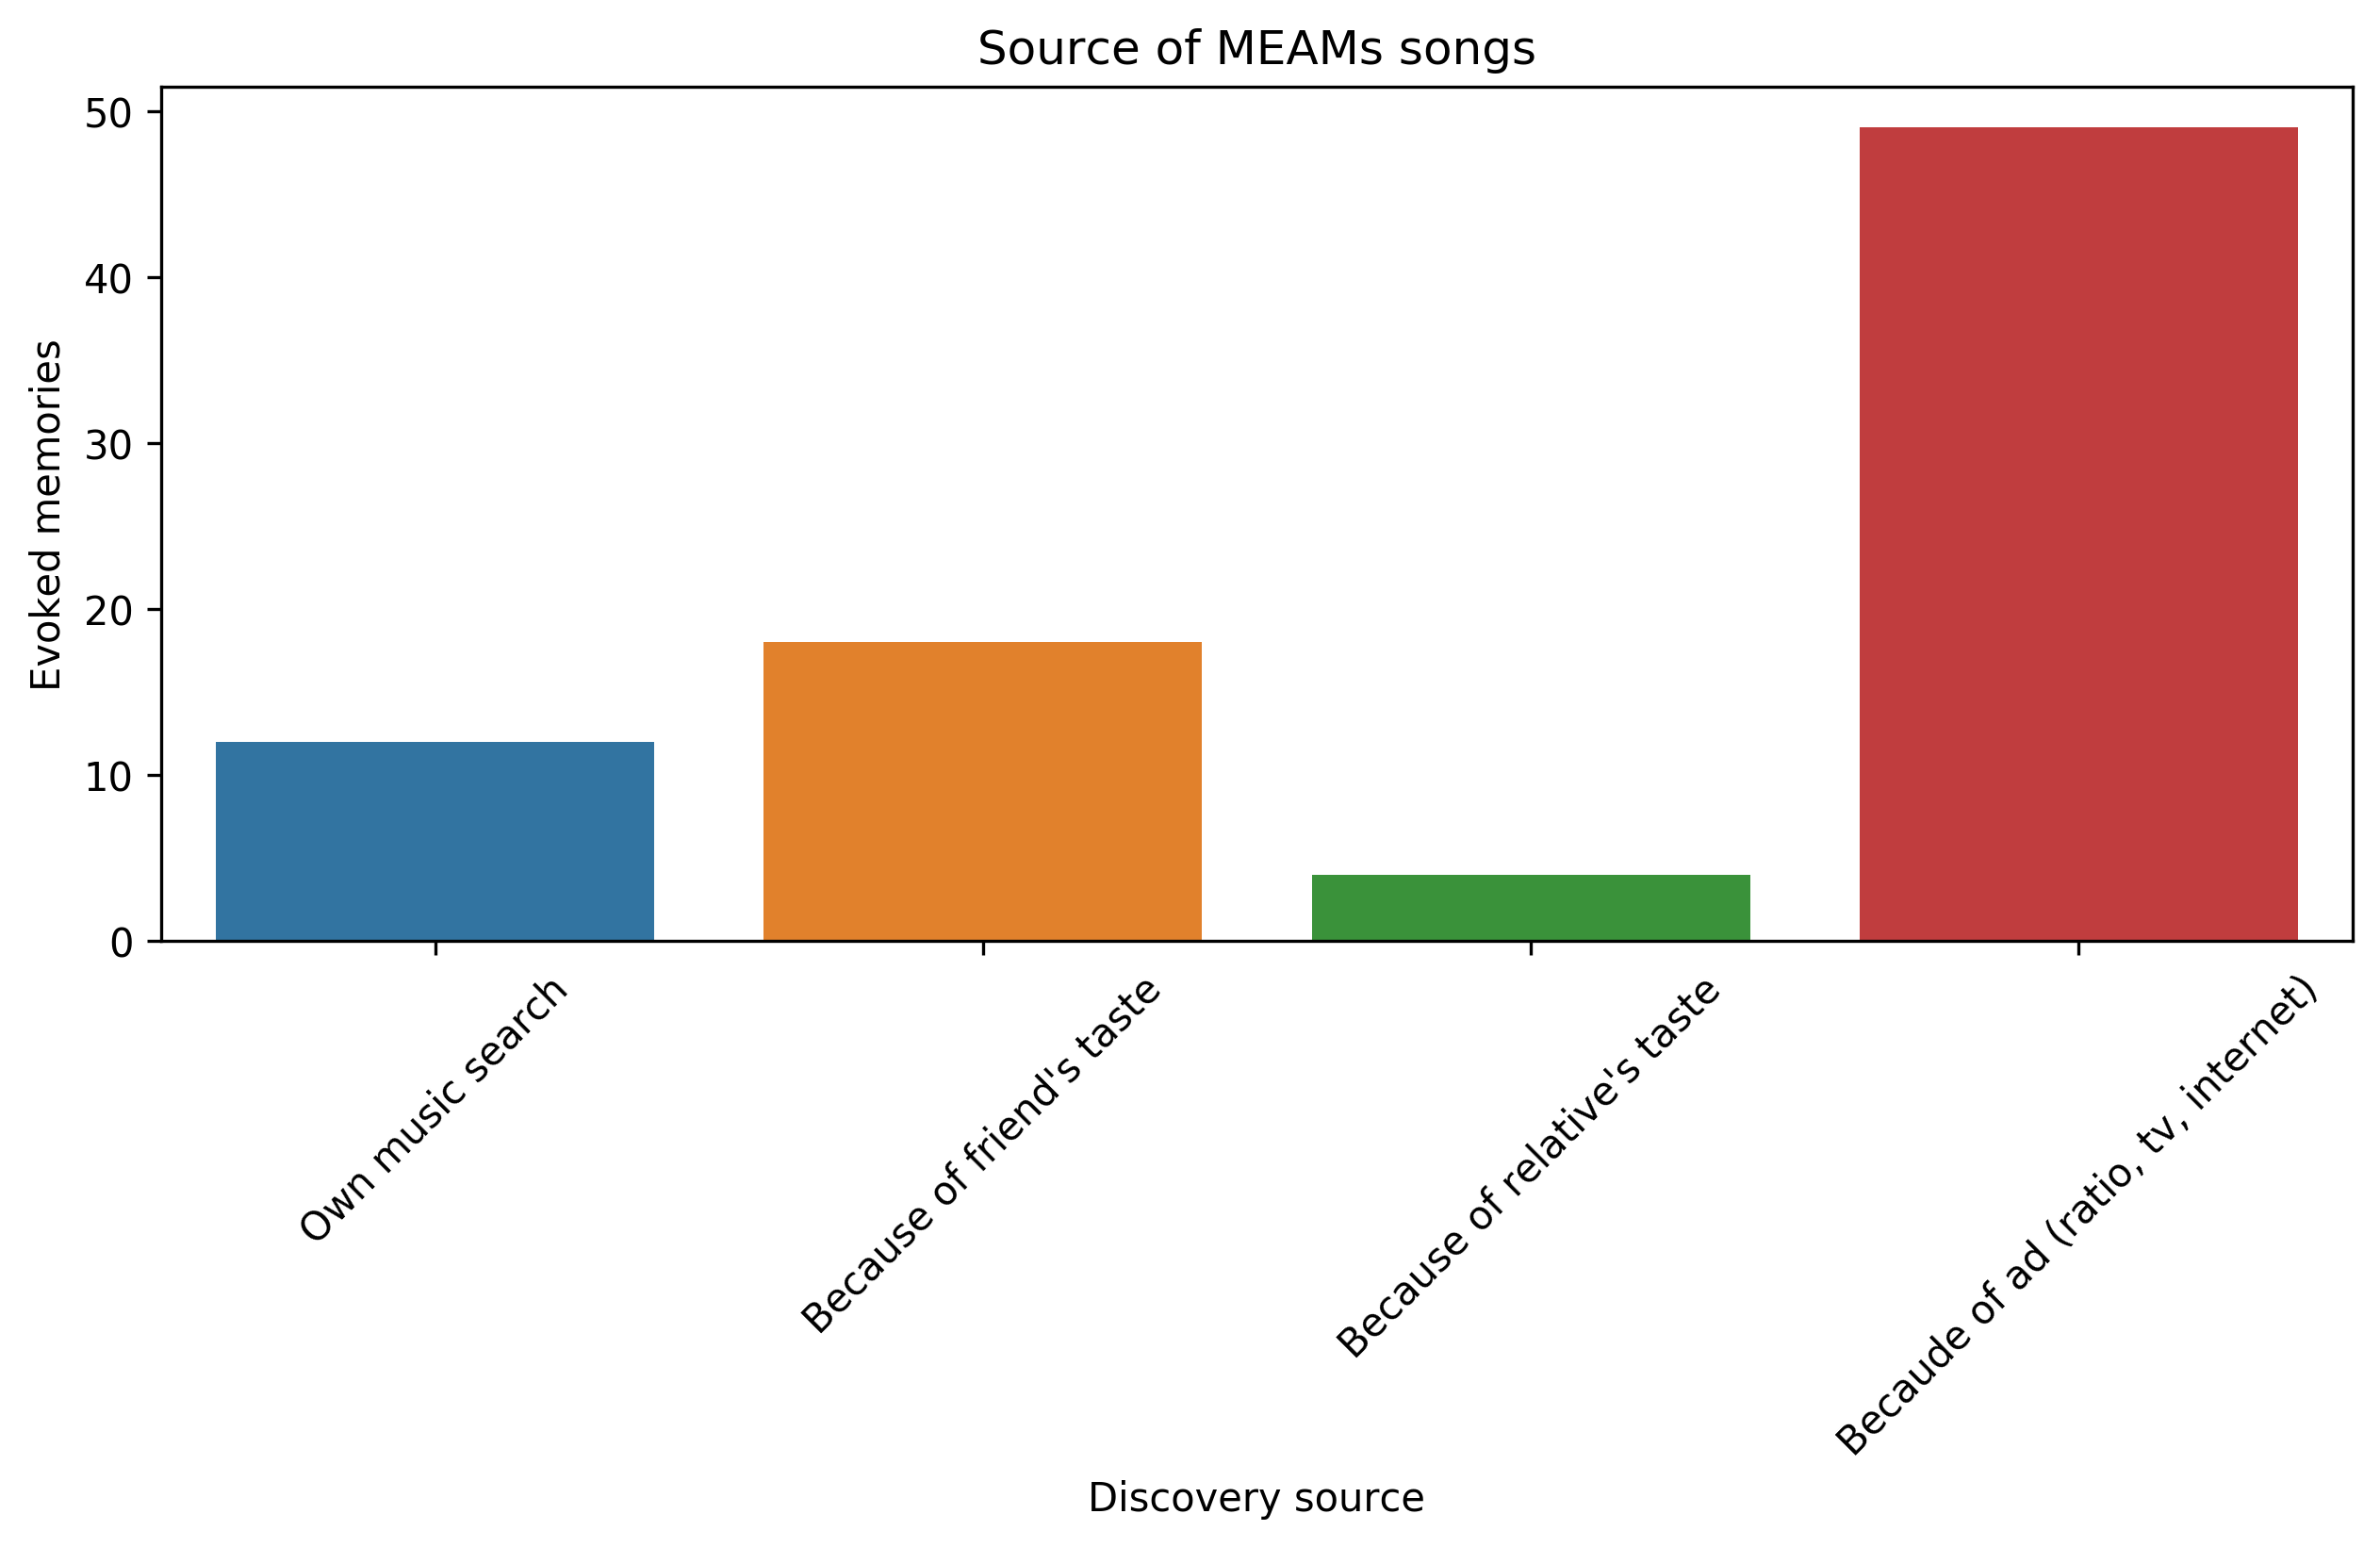

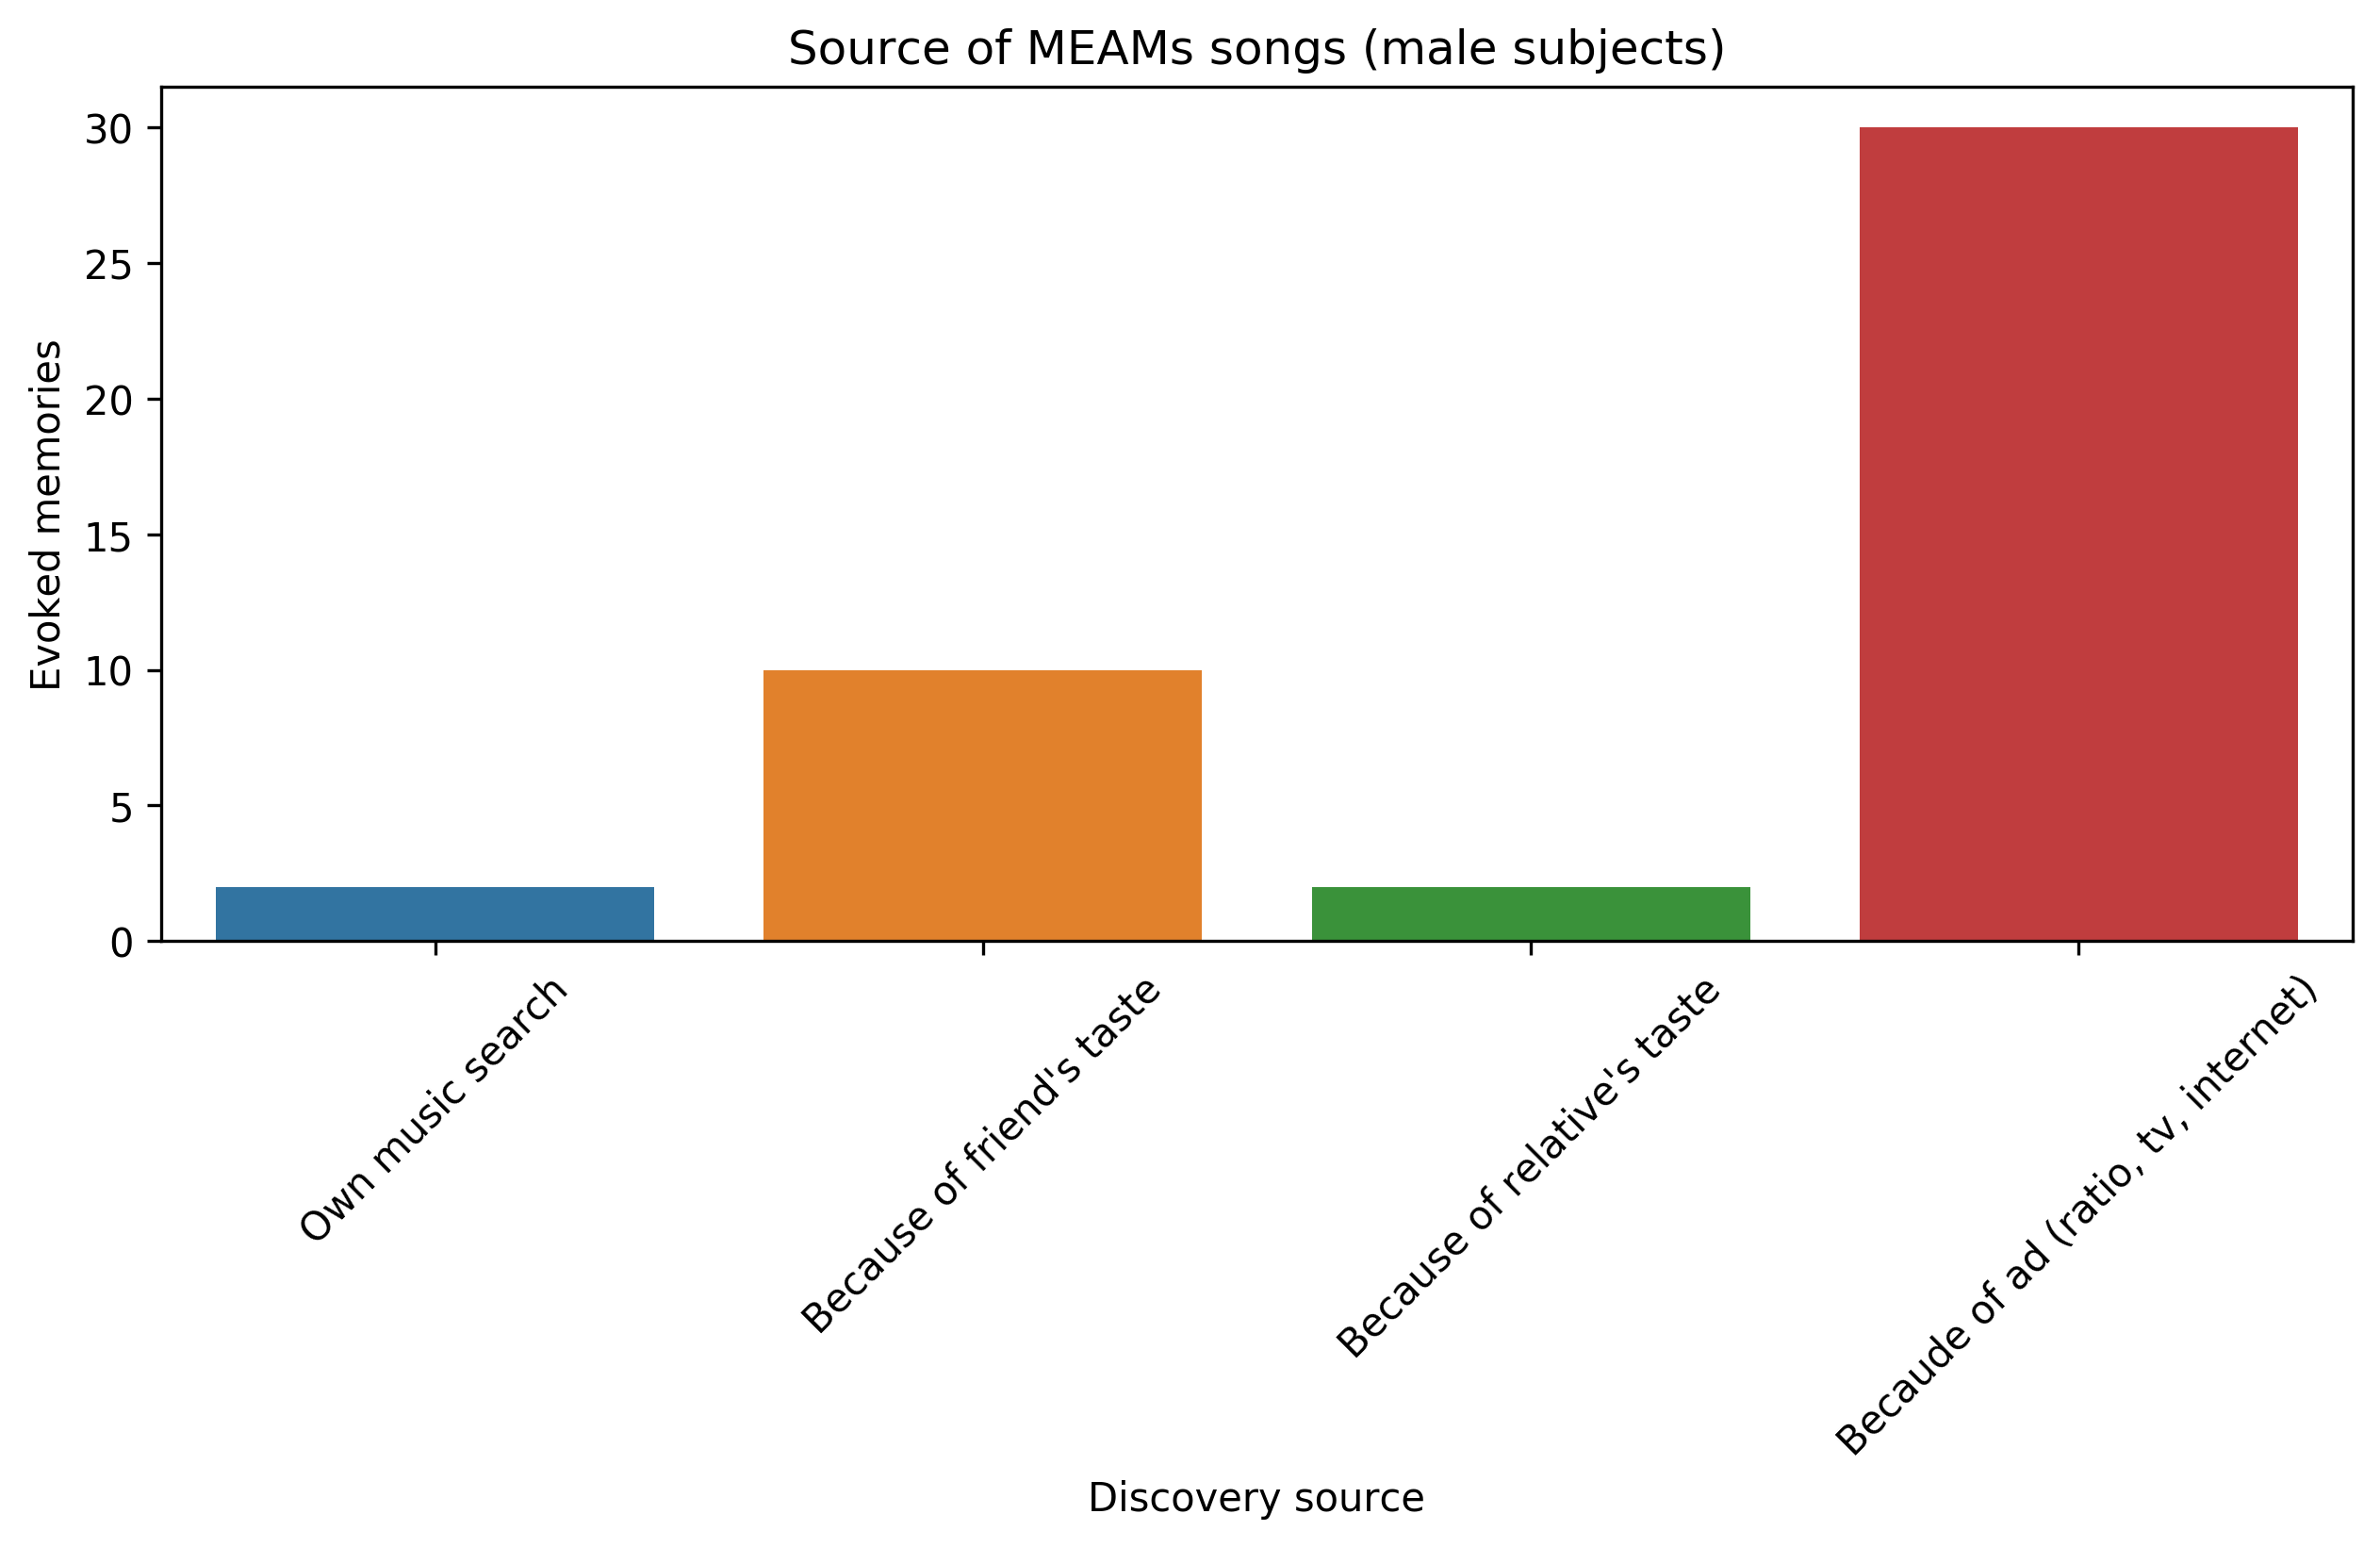

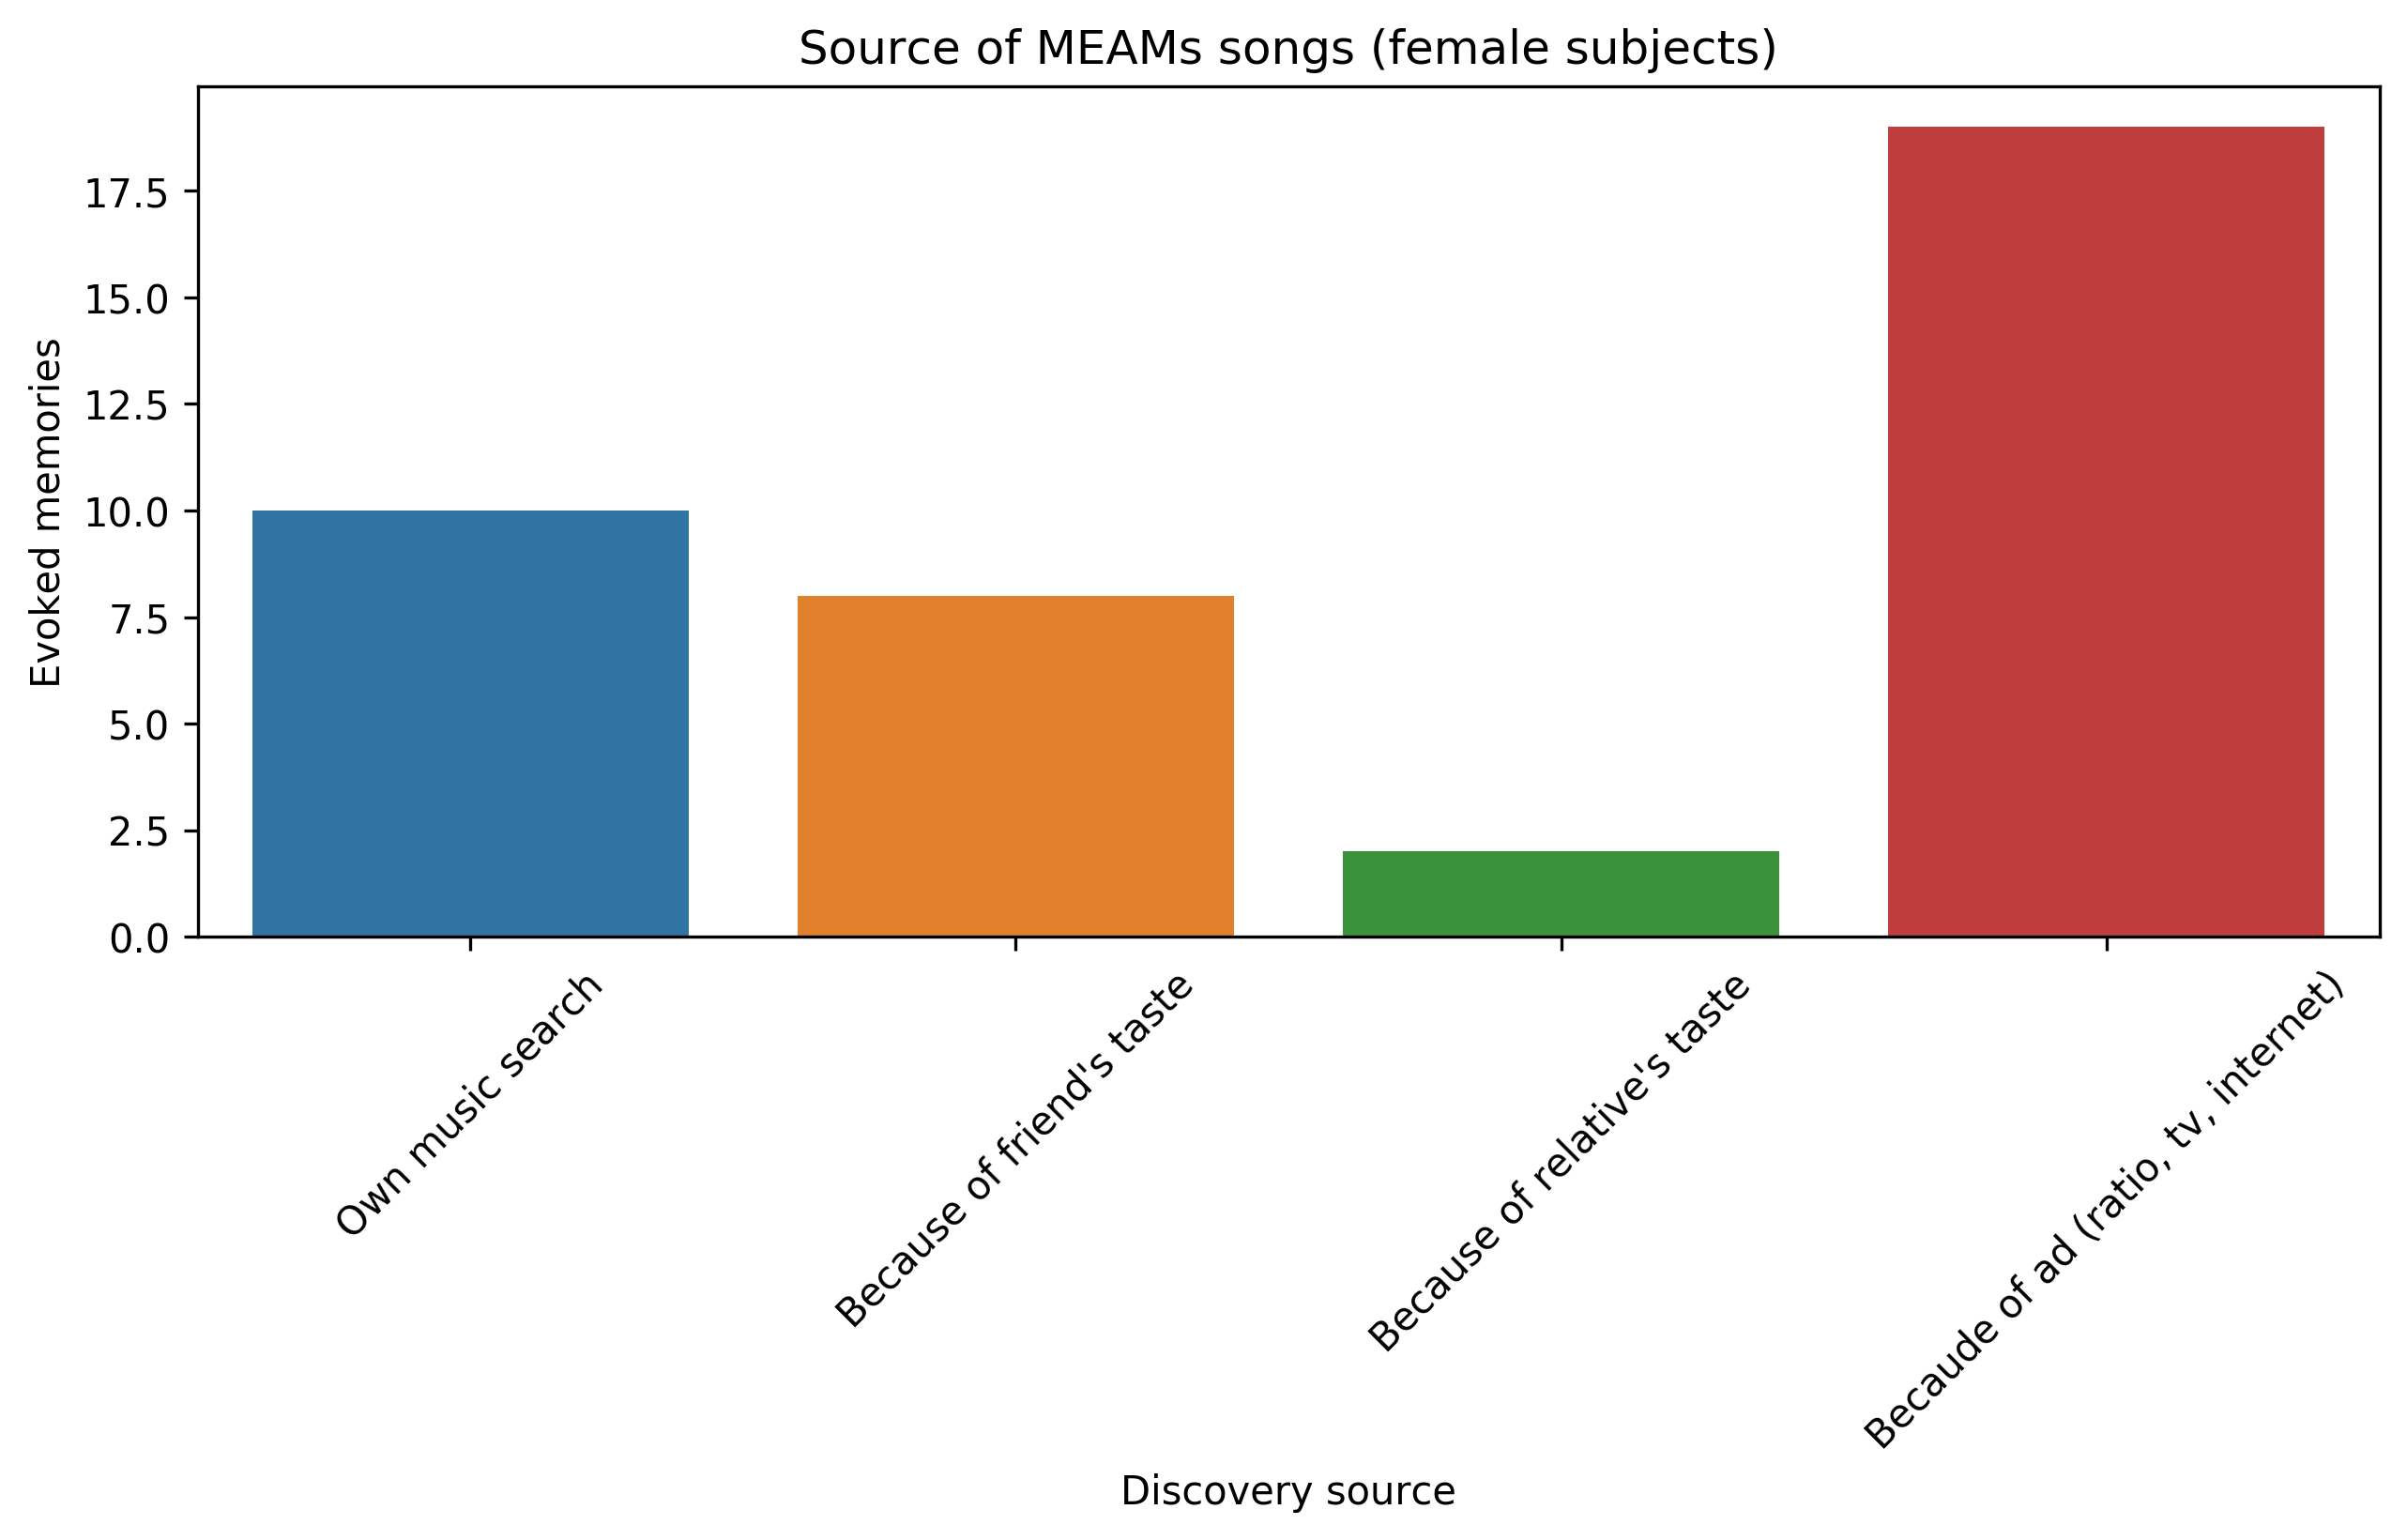

In [10]:
# obtans only columns with memories summarized by source
df_meams_summary_by_source = df_meams[['source_own-music-search', 
                                       'source_friend', 
                                       'source_family',
                                       'source_ad', 'sex']]

# organise by knowledge and discovery source
df_meams_summary_by_source_all = df_meams_summary_by_source.sum().to_frame().transpose()

# replace discovery descriptors
df_meams_summary_by_source_all.rename(columns=discovery_descriptors, inplace=True)

# plot by knowledge
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_source_barplot_all = sns.barplot(data=df_meams_summary_by_source_all)
meams_summary_by_source_barplot_all.set(xlabel='Discovery source', ylabel='Evoked memories', title='Source of MEAMs songs')
plt.xticks(rotation=45)
plt.show()

# organise by knowledge and discovery source for male only
df_meams_summary_by_source_m = df_meams_summary_by_source.loc[df_meams_summary_by_source['sex'] == 'M']
df_meams_summary_by_source_m = df_meams_summary_by_source_m.sum().to_frame().transpose()

# replace discovery descriptors
df_meams_summary_by_source_m.rename(columns=discovery_descriptors, inplace=True)

# plot by knowledge
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_source_barplot_m = sns.barplot(data=df_meams_summary_by_source_m)
meams_summary_by_source_barplot_m.set(xlabel='Discovery source', ylabel='Evoked memories', title='Source of MEAMs songs (male subjects)')
plt.xticks(rotation=45)
plt.show()

# organise by knowledge and discovery source for female only
df_meams_summary_by_source_f = df_meams_summary_by_source.loc[df_meams_summary_by_source['sex'] == 'F']
df_meams_summary_by_source_f = df_meams_summary_by_source_f.sum().to_frame().transpose()

# replace discovery descriptors
df_meams_summary_by_source_f.rename(columns=discovery_descriptors, inplace=True)

# plot by knowledge
fig, axs = plt.subplots(figsize=(10,4), dpi=300)
meams_summary_by_source_barplot_f = sns.barplot(data=df_meams_summary_by_source_f)
meams_summary_by_source_barplot_f.set(xlabel='Discovery source', ylabel='Evoked memories', title='Source of MEAMs songs (female subjects)')
plt.xticks(rotation=45)
plt.show()

    subject  age                     song  evoked_memory  valence  arousal  \
4    jf_m30   30  Donde estan corazon (O)              1      100       18   
5    mp_f29   29  Donde estan corazon (O)              1      -27      -57   
7    mc_m29   29  Donde estan corazon (O)              1      -71      -66   
9    cg_f31   31  Donde estan corazon (O)              1      -44      -42   
14   jf_m30   30  Donde estan corazon (C)              1       -4     -100   
..      ...  ...                      ...            ...      ...      ...   
191  mg_f30   30         Viva la vida (C)              1       89       40   
193  vr_m34   34         Viva la vida (C)              1       97       32   
196  ms_f30   30         Viva la vida (C)              1       25       78   
197  mc_m29   29         Viva la vida (C)              1       73       71   
199  cg_f31   31         Viva la vida (C)              1       84      -26   

     valence_arousal_length  vividness_score sentiment  emotion

Text(0.5, 1, 'Correlation of Evaluation Metrics')

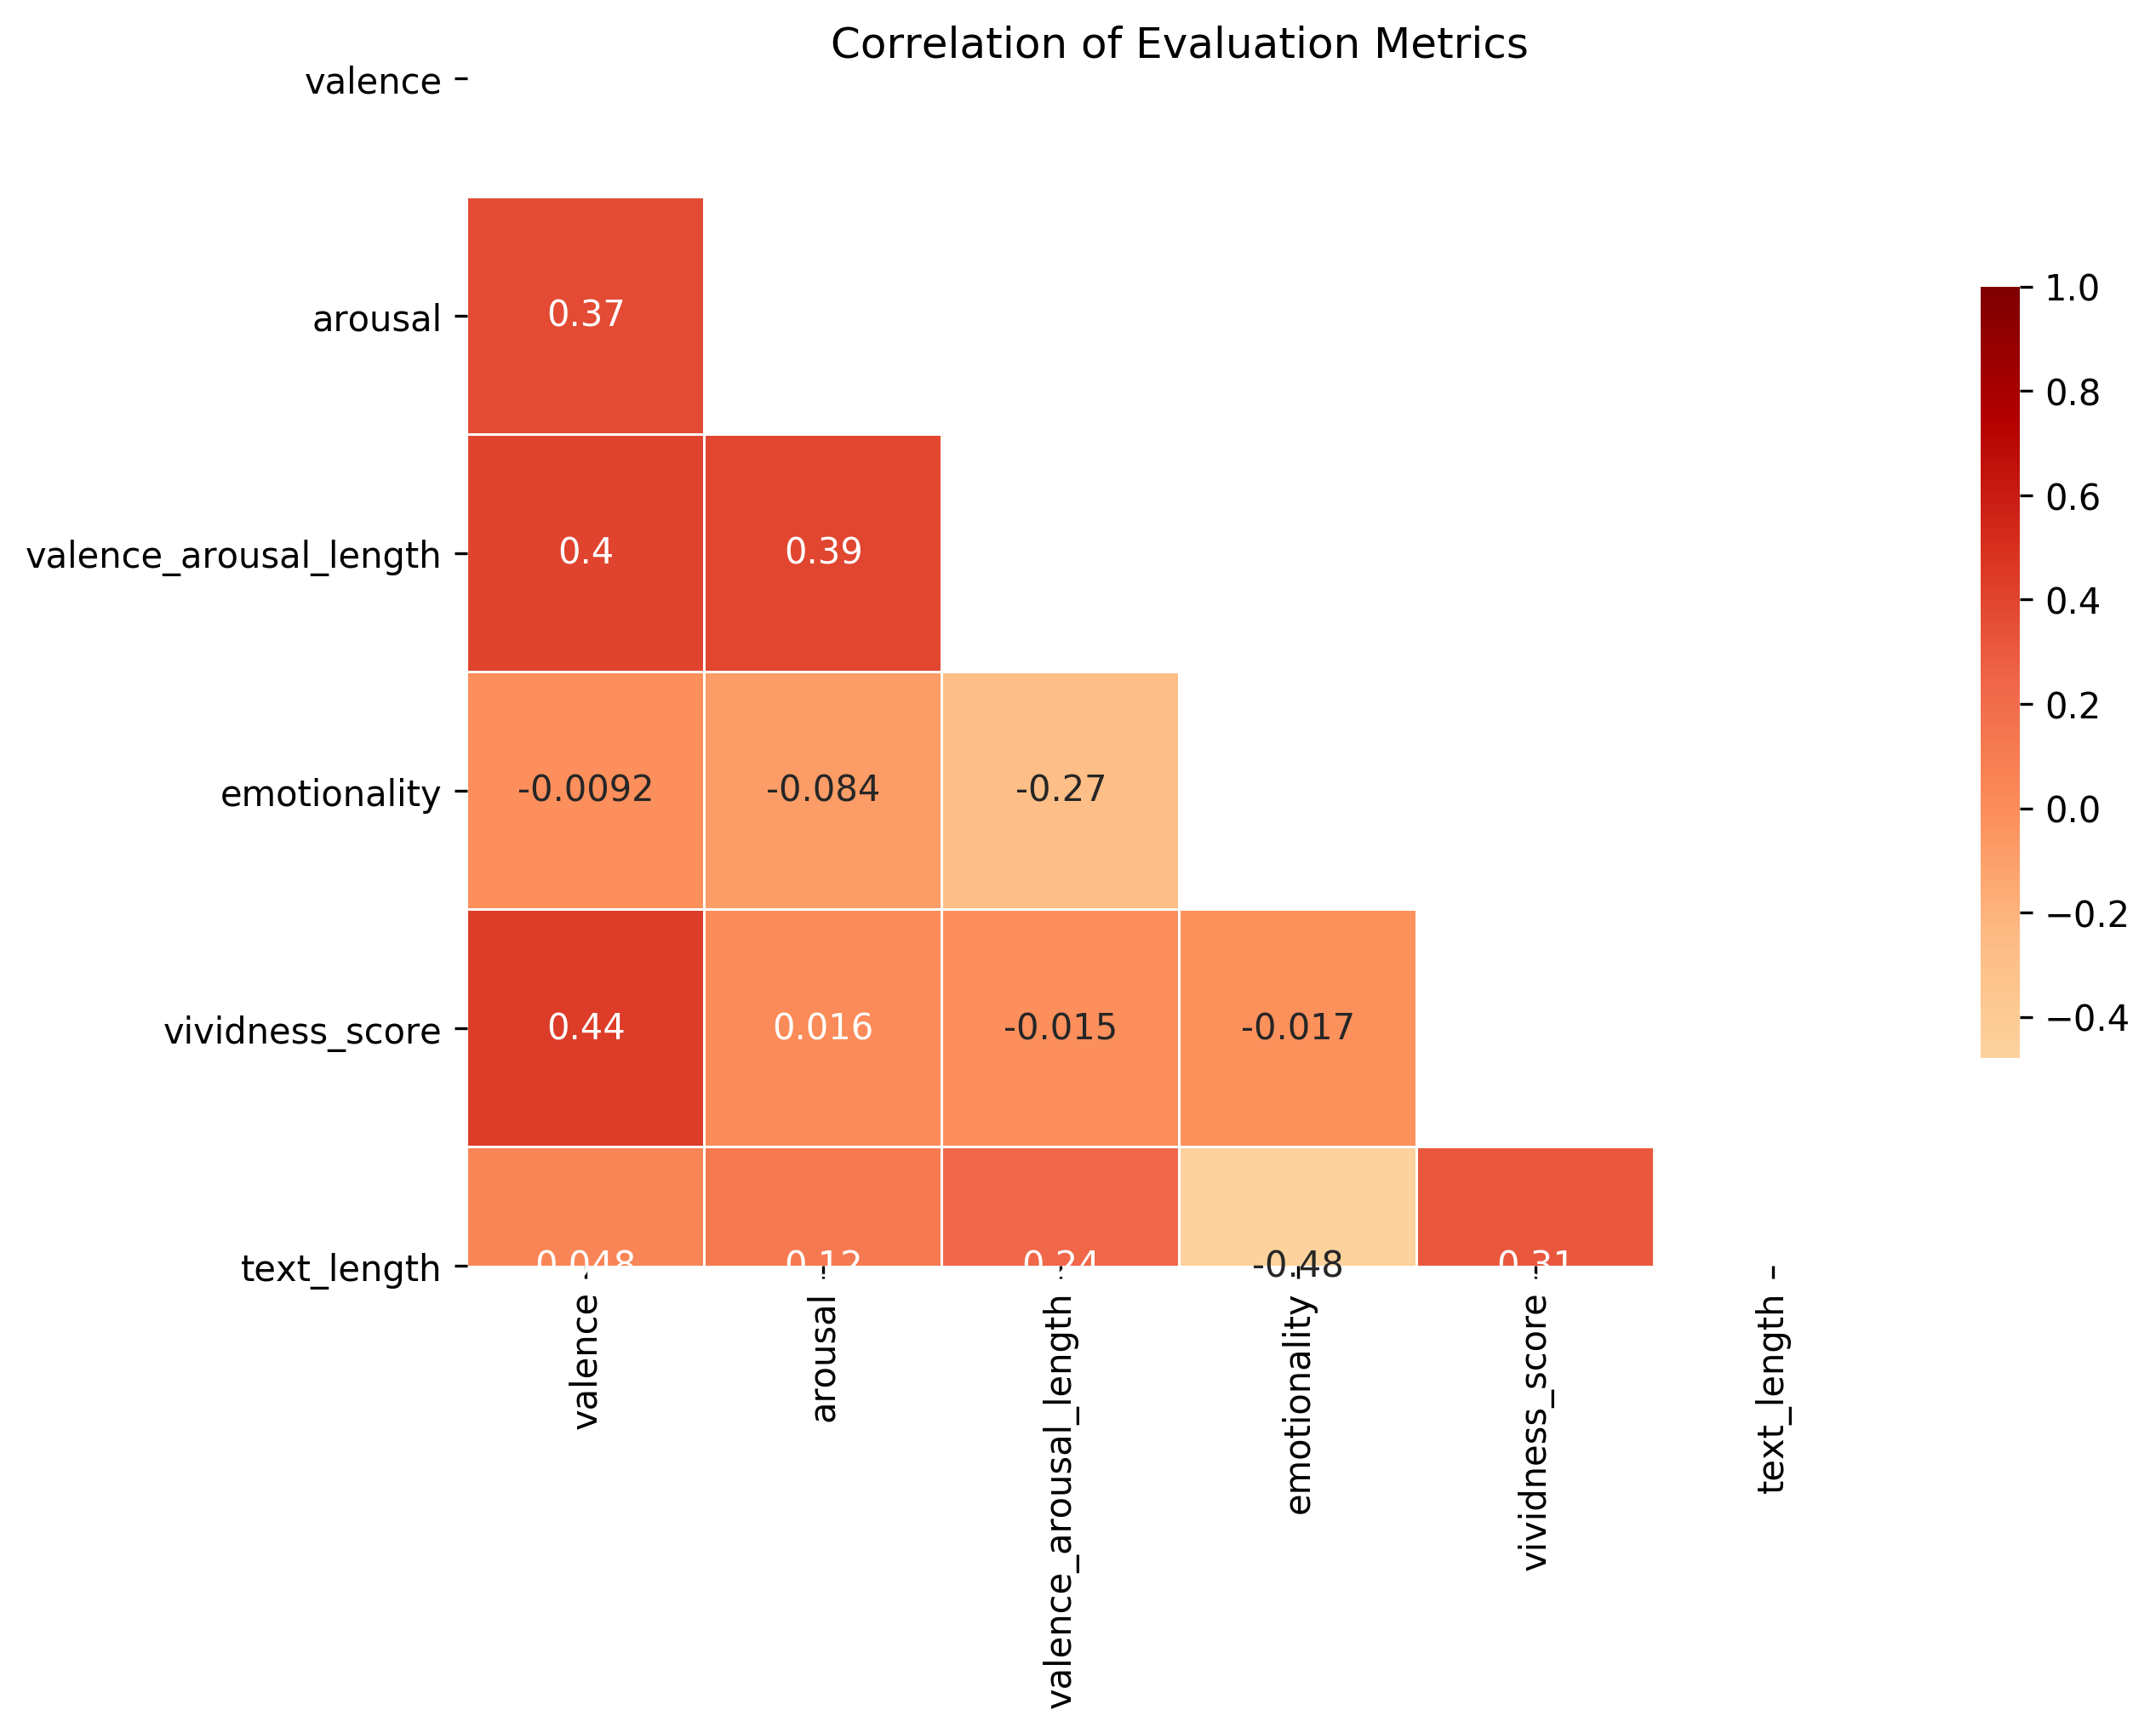

In [55]:
print (df_meams)
df_meams_corr = df_meams[['valence', 'arousal', 'valence_arousal_length', 'emotionality', 'vividness_score', 'text_length']].copy()
df_meams_corr = df_meams_corr.loc[
    (df_meams_corr['valence_arousal_length'] > 1) &
    (df_meams_corr['emotionality'] > 0) &
    (df_meams_corr['vividness_score'] > 0)
]
#missing: time spent!
corr = df_meams_corr.corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 8), dpi = 300)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=color_map, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title("Correlation of Evaluation Metrics")